In [1]:
import os
from PIL import Image
from pathlib import Path

def analyze_image_folders(root_path):
    folders_stats = {}
    
    # Walk through all folders
    for folder_path, _, files in os.walk(root_path):
        if files:  # Only process folders containing files
            folder_name = Path(folder_path).name
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            
            if image_files:  # Only process folders containing images
                stats = {
                    'count': 0,
                    'dimensions': set()
                }
                
                # Analyze each image
                for img_file in image_files:
                    try:
                        with Image.open(os.path.join(folder_path, img_file)) as img:
                            stats['count'] += 1
                            stats['dimensions'].add(img.size)
                    except Exception as e:
                        print(f"Error processing {img_file}: {e}")
                
                folders_stats[folder_name] = stats

    # Print summary
    print("\nDataset Analysis:")
    print("=" * 50)
    for folder, stats in folders_stats.items():
        print(f"\nFolder: {folder}")
        print(f"Total images: {stats['count']}")
        print("Image dimensions found:")
        for dim in stats['dimensions']:
            print(f"  - {dim[0]} x {dim[1]} pixels")
        print("-" * 30)

# Usage example
analyze_image_folders("/kaggle/input/lungs-disease-dataset-4-types")


Dataset Analysis:

Folder: Tuberculosis
Total images: 1220
Image dimensions found:
  - 512 x 512 pixels
------------------------------

Folder: Bacterial Pneumonia
Total images: 1205
Image dimensions found:
  - 976 x 544 pixels
  - 1144 x 784 pixels
  - 1318 x 820 pixels
  - 888 x 440 pixels
  - 880 x 576 pixels
  - 1592 x 1041 pixels
  - 1848 x 1632 pixels
  - 1232 x 744 pixels
  - 1328 x 968 pixels
  - 920 x 648 pixels
  - 1712 x 1488 pixels
  - 1118 x 740 pixels
  - 1206 x 871 pixels
  - 976 x 656 pixels
  - 1144 x 896 pixels
  - 1538 x 1353 pixels
  - 1310 x 928 pixels
  - 1528 x 1416 pixels
  - 1184 x 712 pixels
  - 1202 x 986 pixels
  - 1256 x 728 pixels
  - 792 x 584 pixels
  - 1016 x 728 pixels
  - 1128 x 817 pixels
  - 1576 x 1056 pixels
  - 1312 x 888 pixels
  - 1216 x 920 pixels
  - 2000 x 1896 pixels
  - 2050 x 1497 pixels
  - 1016 x 584 pixels
  - 1088 x 600 pixels
  - 816 x 568 pixels
  - 1172 x 859 pixels
  - 1040 x 560 pixels
  - 743 x 453 pixels
  - 1000 x 496 pixels


In [2]:
import os
import numpy as np
from PIL import Image
from pathlib import Path

def convert_to_mnist_style(image_path):
    img = Image.open(image_path).convert('L')
    target_size = 28
    ratio = target_size / max(img.size)
    new_size = tuple([int(dim * ratio) for dim in img.size])
    
    img = img.resize(new_size, Image.Resampling.LANCZOS)
    mnist_img = Image.new('L', (target_size, target_size), 255)
    
    offset = ((target_size - new_size[0]) // 2,
             (target_size - new_size[1]) // 2)
    mnist_img.paste(img, offset)
    
    mnist_array = np.array(mnist_img)
    mnist_array = 255 - mnist_array
    return Image.fromarray(mnist_array)

def process_dataset(input_dir, output_dir):
    # Create base output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Walk through input directory
    for root, _, files in os.walk(input_dir):
        # Get relative path to maintain structure
        rel_path = os.path.relpath(root, input_dir)
        current_output_dir = os.path.join(output_dir, rel_path + '_MNIST')
        
        if files:
            os.makedirs(current_output_dir, exist_ok=True)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            
            for img_file in image_files:
                try:
                    input_path = os.path.join(root, img_file)
                    output_path = os.path.join(current_output_dir, img_file)
                    
                    mnist_img = convert_to_mnist_style(input_path)
                    mnist_img.save(output_path)
                    print(f"Processed: {input_path} -> {output_path}")
                except Exception as e:
                    print(f"Error processing {img_file}: {e}")

# Usage
input_directory = "/kaggle/input/lungs-disease-dataset-4-types"
output_directory = "/kaggle/working/dataset"
process_dataset(input_directory, output_directory)

Processed: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5161.jpeg -> /kaggle/working/dataset/Lung Disease Dataset/val/Tuberculosis_MNIST/test_0_5161.jpeg
Processed: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_4769.jpeg -> /kaggle/working/dataset/Lung Disease Dataset/val/Tuberculosis_MNIST/test_0_4769.jpeg
Processed: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1443.jpeg -> /kaggle/working/dataset/Lung Disease Dataset/val/Tuberculosis_MNIST/test_0_1443.jpeg
Processed: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5261.jpeg -> /kaggle/working/dataset/Lung Disease Dataset/val/Tuberculosis_MNIST/test_0_5261.jpeg
Processed: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-392.jpg -> /kaggle/working/dataset/Lung Disease Dataset/val/Tuberculosis_MNIST/Tuberculosis-392.jpg
Pr

In [3]:
import os
from PIL import Image
from pathlib import Path

def analyze_image_folders(root_path):
    folders_stats = {}
    
    # Walk through all folders
    for folder_path, _, files in os.walk(root_path):
        if files:  # Only process folders containing files
            folder_name = Path(folder_path).name
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            
            if image_files:  # Only process folders containing images
                stats = {
                    'count': 0,
                    'dimensions': set()
                }
                
                # Analyze each image
                for img_file in image_files:
                    try:
                        with Image.open(os.path.join(folder_path, img_file)) as img:
                            stats['count'] += 1
                            stats['dimensions'].add(img.size)
                    except Exception as e:
                        print(f"Error processing {img_file}: {e}")
                
                folders_stats[folder_name] = stats

    # Print summary
    print("\nDataset Analysis:")
    print("=" * 50)
    for folder, stats in folders_stats.items():
        print(f"\nFolder: {folder}")
        print(f"Total images: {stats['count']}")
        print("Image dimensions found:")
        for dim in stats['dimensions']:
            print(f"  - {dim[0]} x {dim[1]} pixels")
        print("-" * 30)

# Usage example
analyze_image_folders("/kaggle/working/dataset")


Dataset Analysis:

Folder: Normal_MNIST
Total images: 1207
Image dimensions found:
  - 28 x 28 pixels
------------------------------

Folder: Corona Virus Disease_MNIST
Total images: 1218
Image dimensions found:
  - 28 x 28 pixels
------------------------------

Folder: Tuberculosis_MNIST
Total images: 1220
Image dimensions found:
  - 28 x 28 pixels
------------------------------

Folder: Viral Pneumonia_MNIST
Total images: 1204
Image dimensions found:
  - 28 x 28 pixels
------------------------------

Folder: Bacterial Pneumonia_MNIST
Total images: 1205
Image dimensions found:
  - 28 x 28 pixels
------------------------------


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import f1_score

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

### CONSTANTS ###
NUM_EPOCHS = 50
LEARNING_RATE = 0.0001
BATCH_SIZE = 32
IMG_SIZE = 28
DATA_PATH = '/kaggle/working/dataset/Lung Disease Dataset'

# First, let's check number of classes
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = ImageFolder(root=f"{DATA_PATH}/train", transform=transform)
NUM_CLASSES = len(train_dataset.classes)
print(f"Number of classes: {NUM_CLASSES}")
print(f"Class mapping: {train_dataset.class_to_idx}")


Using device: cuda
Number of classes: 5
Class mapping: {'Bacterial Pneumonia_MNIST': 0, 'Corona Virus Disease_MNIST': 1, 'Normal_MNIST': 2, 'Tuberculosis_MNIST': 3, 'Viral Pneumonia_MNIST': 4}


In [5]:
# Data loaders
val_dataset = ImageFolder(root=f"{DATA_PATH}/val", transform=transform)
test_dataset = ImageFolder(root=f"{DATA_PATH}/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def print_model_summary(model):
    print("Model Architecture:")
    print("=" * 50)
    print(model)
    print("\nLayer Parameters:")
    print("=" * 50)
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()}")
    print("\nTotal Trainable Parameters:", count_parameters(model))

# DNN

In [5]:
# Model Definition with correct number of output classes
class DNN(nn.Module):
    def __init__(self, img_size):
        super(DNN, self).__init__()
        self.img_size = img_size  # Total number of input pixels

        # Fully connected layers
        self.fc1 = nn.Linear(img_size, 64 * 4 * 4)  # First hidden layer
        self.fc2 = nn.Linear(64 * 4 * 4, 128)  # Second hidden layer
        self.fc3 = nn.Linear(128, NUM_CLASSES)  # Output layer with correct number of classes

    def forward(self, x):
        x = x.view(-1, self.img_size)  # Flatten the input image
        x = F.relu(self.fc1(x))  # Apply ReLU activation after first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after second layer
        x = self.fc3(x)  # Output layer
        return x

In [7]:
model = DNN(img_size=IMG_SIZE*IMG_SIZE).to(device)
print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))


Trainable parameters: 935685


In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def print_model_summary(model):
    print("Model Architecture:")
    print("=" * 50)
    print(model)
    print("\nLayer Parameters:")
    print("=" * 50)
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()}")
    print("\nTotal Trainable Parameters:", count_parameters(model))

print_model_summary(model)

Model Architecture:
DNN(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=5, bias=True)
)

Layer Parameters:
fc1.weight: torch.Size([1024, 784])
fc1.bias: torch.Size([1024])
fc2.weight: torch.Size([128, 1024])
fc2.bias: torch.Size([128])
fc3.weight: torch.Size([5, 128])
fc3.bias: torch.Size([5])

Total Trainable Parameters: 935685


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training metrics
train_loss_dict = {}
train_acc_dict = {}
val_loss_dict = {}
val_acc_dict = {}

# Training loop
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train()
    train_loss, train_count = 0, 0
    n_train_correct, n_train_samples = 0, 0
    n_val_correct, n_val_samples = 0, 0
    val_loss, val_count = 0, 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        predicted = torch.argmax(outputs.data, 1)
        
        n_train_samples += labels.size(0)
        n_train_correct += (predicted == labels).sum().item()
        
        train_loss += loss.item()
        train_count += 1
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss_dict[epoch] = train_loss / train_count
    train_acc_dict[epoch] = n_train_correct / n_train_samples

    # Validation
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            predicted = torch.argmax(outputs.data, 1)
            
            n_val_samples += labels.size(0)
            n_val_correct += (predicted == labels).sum().item()
            
            val_loss += loss.item()
            val_count += 1
        
        val_loss_dict[epoch] = val_loss / val_count
        val_acc_dict[epoch] = n_val_correct / n_val_samples
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss_dict[epoch]:.4f}, Train Acc: {train_acc_dict[epoch]:.4f}, Val Loss: {val_loss_dict[epoch]:.4f}, Val Acc: {val_acc_dict[epoch]:.4f}')

# Testing
model.eval()
test_correct = 0
test_samples = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        predicted = torch.argmax(outputs.data, 1)
        
        test_samples += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_accuracy = test_correct / test_samples
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')


  2%|▏         | 1/50 [00:04<03:48,  4.66s/it]

Epoch [1/50], Train Loss: 0.9046, Train Acc: 0.6581, Val Loss: 0.6878, Val Acc: 0.7312


  4%|▍         | 2/50 [00:08<03:15,  4.08s/it]

Epoch [2/50], Train Loss: 0.6141, Train Acc: 0.7610, Val Loss: 0.5989, Val Acc: 0.7579


  6%|▌         | 3/50 [00:11<03:02,  3.88s/it]

Epoch [3/50], Train Loss: 0.5351, Train Acc: 0.7894, Val Loss: 0.5571, Val Acc: 0.7842


  8%|▊         | 4/50 [00:15<02:55,  3.81s/it]

Epoch [4/50], Train Loss: 0.4909, Train Acc: 0.8038, Val Loss: 0.5244, Val Acc: 0.7892


 10%|█         | 5/50 [00:19<02:48,  3.73s/it]

Epoch [5/50], Train Loss: 0.4561, Train Acc: 0.8190, Val Loss: 0.5058, Val Acc: 0.7951


 12%|█▏        | 6/50 [00:22<02:43,  3.72s/it]

Epoch [6/50], Train Loss: 0.4377, Train Acc: 0.8244, Val Loss: 0.5429, Val Acc: 0.7788


 14%|█▍        | 7/50 [00:26<02:39,  3.71s/it]

Epoch [7/50], Train Loss: 0.4150, Train Acc: 0.8320, Val Loss: 0.4931, Val Acc: 0.8011


 16%|█▌        | 8/50 [00:30<02:34,  3.67s/it]

Epoch [8/50], Train Loss: 0.3962, Train Acc: 0.8432, Val Loss: 0.4851, Val Acc: 0.7991


 18%|█▊        | 9/50 [00:33<02:29,  3.64s/it]

Epoch [9/50], Train Loss: 0.3745, Train Acc: 0.8513, Val Loss: 0.4934, Val Acc: 0.8011


 20%|██        | 10/50 [00:37<02:25,  3.64s/it]

Epoch [10/50], Train Loss: 0.3657, Train Acc: 0.8555, Val Loss: 0.5162, Val Acc: 0.7932


 22%|██▏       | 11/50 [00:41<02:21,  3.62s/it]

Epoch [11/50], Train Loss: 0.3481, Train Acc: 0.8617, Val Loss: 0.4847, Val Acc: 0.8130


 24%|██▍       | 12/50 [00:44<02:17,  3.62s/it]

Epoch [12/50], Train Loss: 0.3370, Train Acc: 0.8650, Val Loss: 0.5052, Val Acc: 0.7951


 26%|██▌       | 13/50 [00:48<02:14,  3.62s/it]

Epoch [13/50], Train Loss: 0.3190, Train Acc: 0.8756, Val Loss: 0.4929, Val Acc: 0.8090


 28%|██▊       | 14/50 [00:51<02:09,  3.60s/it]

Epoch [14/50], Train Loss: 0.3090, Train Acc: 0.8783, Val Loss: 0.5069, Val Acc: 0.7986


 30%|███       | 15/50 [00:55<02:06,  3.61s/it]

Epoch [15/50], Train Loss: 0.2971, Train Acc: 0.8822, Val Loss: 0.5119, Val Acc: 0.8090


 32%|███▏      | 16/50 [00:59<02:02,  3.60s/it]

Epoch [16/50], Train Loss: 0.2867, Train Acc: 0.8867, Val Loss: 0.4996, Val Acc: 0.8051


 34%|███▍      | 17/50 [01:02<01:58,  3.58s/it]

Epoch [17/50], Train Loss: 0.2805, Train Acc: 0.8867, Val Loss: 0.4842, Val Acc: 0.8145


 36%|███▌      | 18/50 [01:06<01:54,  3.57s/it]

Epoch [18/50], Train Loss: 0.2611, Train Acc: 0.8974, Val Loss: 0.4983, Val Acc: 0.8100


 38%|███▊      | 19/50 [01:09<01:50,  3.55s/it]

Epoch [19/50], Train Loss: 0.2529, Train Acc: 0.9030, Val Loss: 0.5326, Val Acc: 0.8021


 40%|████      | 20/50 [01:13<01:46,  3.55s/it]

Epoch [20/50], Train Loss: 0.2517, Train Acc: 0.9070, Val Loss: 0.5140, Val Acc: 0.8075


 42%|████▏     | 21/50 [01:16<01:44,  3.59s/it]

Epoch [21/50], Train Loss: 0.2375, Train Acc: 0.9057, Val Loss: 0.5081, Val Acc: 0.8110


 44%|████▍     | 22/50 [01:20<01:40,  3.59s/it]

Epoch [22/50], Train Loss: 0.2229, Train Acc: 0.9166, Val Loss: 0.5254, Val Acc: 0.8130


 46%|████▌     | 23/50 [01:23<01:36,  3.57s/it]

Epoch [23/50], Train Loss: 0.2188, Train Acc: 0.9154, Val Loss: 0.5163, Val Acc: 0.8140


 48%|████▊     | 24/50 [01:27<01:32,  3.56s/it]

Epoch [24/50], Train Loss: 0.2060, Train Acc: 0.9258, Val Loss: 0.5162, Val Acc: 0.8165


 50%|█████     | 25/50 [01:31<01:28,  3.55s/it]

Epoch [25/50], Train Loss: 0.2039, Train Acc: 0.9245, Val Loss: 0.5293, Val Acc: 0.8180


 52%|█████▏    | 26/50 [01:34<01:25,  3.55s/it]

Epoch [26/50], Train Loss: 0.1933, Train Acc: 0.9286, Val Loss: 0.5354, Val Acc: 0.8180


 54%|█████▍    | 27/50 [01:38<01:21,  3.53s/it]

Epoch [27/50], Train Loss: 0.1919, Train Acc: 0.9270, Val Loss: 0.5574, Val Acc: 0.8075


 56%|█████▌    | 28/50 [01:41<01:17,  3.51s/it]

Epoch [28/50], Train Loss: 0.1798, Train Acc: 0.9336, Val Loss: 0.5918, Val Acc: 0.8036


 58%|█████▊    | 29/50 [01:45<01:14,  3.55s/it]

Epoch [29/50], Train Loss: 0.1693, Train Acc: 0.9405, Val Loss: 0.5689, Val Acc: 0.8065


 60%|██████    | 30/50 [01:48<01:11,  3.58s/it]

Epoch [30/50], Train Loss: 0.1663, Train Acc: 0.9362, Val Loss: 0.5607, Val Acc: 0.8051


 62%|██████▏   | 31/50 [01:52<01:07,  3.57s/it]

Epoch [31/50], Train Loss: 0.1598, Train Acc: 0.9417, Val Loss: 0.5879, Val Acc: 0.8051


 64%|██████▍   | 32/50 [01:55<01:04,  3.59s/it]

Epoch [32/50], Train Loss: 0.1540, Train Acc: 0.9445, Val Loss: 0.6008, Val Acc: 0.8135


 66%|██████▌   | 33/50 [01:59<01:00,  3.57s/it]

Epoch [33/50], Train Loss: 0.1451, Train Acc: 0.9478, Val Loss: 0.5976, Val Acc: 0.8130


 68%|██████▊   | 34/50 [02:03<00:56,  3.55s/it]

Epoch [34/50], Train Loss: 0.1429, Train Acc: 0.9504, Val Loss: 0.5763, Val Acc: 0.8110


 70%|███████   | 35/50 [02:06<00:53,  3.56s/it]

Epoch [35/50], Train Loss: 0.1388, Train Acc: 0.9513, Val Loss: 0.6176, Val Acc: 0.8085


 72%|███████▏  | 36/50 [02:10<00:49,  3.56s/it]

Epoch [36/50], Train Loss: 0.1326, Train Acc: 0.9542, Val Loss: 0.6234, Val Acc: 0.8100


 74%|███████▍  | 37/50 [02:13<00:46,  3.56s/it]

Epoch [37/50], Train Loss: 0.1220, Train Acc: 0.9567, Val Loss: 0.6104, Val Acc: 0.8125


 76%|███████▌  | 38/50 [02:17<00:42,  3.58s/it]

Epoch [38/50], Train Loss: 0.1280, Train Acc: 0.9533, Val Loss: 0.6182, Val Acc: 0.8120


 78%|███████▊  | 39/50 [02:21<00:39,  3.62s/it]

Epoch [39/50], Train Loss: 0.1147, Train Acc: 0.9590, Val Loss: 0.6489, Val Acc: 0.8085


 80%|████████  | 40/50 [02:24<00:36,  3.61s/it]

Epoch [40/50], Train Loss: 0.1111, Train Acc: 0.9600, Val Loss: 0.6364, Val Acc: 0.8105


 82%|████████▏ | 41/50 [02:28<00:32,  3.56s/it]

Epoch [41/50], Train Loss: 0.1012, Train Acc: 0.9680, Val Loss: 0.6936, Val Acc: 0.8090


 84%|████████▍ | 42/50 [02:31<00:28,  3.54s/it]

Epoch [42/50], Train Loss: 0.0978, Train Acc: 0.9666, Val Loss: 0.6648, Val Acc: 0.8110


 86%|████████▌ | 43/50 [02:35<00:24,  3.53s/it]

Epoch [43/50], Train Loss: 0.0941, Train Acc: 0.9671, Val Loss: 0.6976, Val Acc: 0.8070


 88%|████████▊ | 44/50 [02:38<00:21,  3.53s/it]

Epoch [44/50], Train Loss: 0.0875, Train Acc: 0.9708, Val Loss: 0.6905, Val Acc: 0.8036


 90%|█████████ | 45/50 [02:42<00:17,  3.54s/it]

Epoch [45/50], Train Loss: 0.0835, Train Acc: 0.9729, Val Loss: 0.7040, Val Acc: 0.8061


 92%|█████████▏| 46/50 [02:45<00:14,  3.59s/it]

Epoch [46/50], Train Loss: 0.0835, Train Acc: 0.9729, Val Loss: 0.6941, Val Acc: 0.8115


 94%|█████████▍| 47/50 [02:49<00:10,  3.56s/it]

Epoch [47/50], Train Loss: 0.0854, Train Acc: 0.9691, Val Loss: 0.7094, Val Acc: 0.8095


 96%|█████████▌| 48/50 [02:52<00:07,  3.55s/it]

Epoch [48/50], Train Loss: 0.0717, Train Acc: 0.9800, Val Loss: 0.7499, Val Acc: 0.8090


 98%|█████████▊| 49/50 [02:56<00:03,  3.56s/it]

Epoch [49/50], Train Loss: 0.0677, Train Acc: 0.9797, Val Loss: 0.7667, Val Acc: 0.8031


100%|██████████| 50/50 [02:59<00:00,  3.60s/it]

Epoch [50/50], Train Loss: 0.0667, Train Acc: 0.9790, Val Loss: 0.7662, Val Acc: 0.8070


Test Accuracy: 0.8079
F1 Score: 0.8070


In [11]:
from sklearn.metrics import classification_report

# After getting y_true and y_pred from test loop
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

Classification Report:
                            precision    recall  f1-score   support

 Bacterial Pneumonia_MNIST       0.70      0.72      0.71       403
Corona Virus Disease_MNIST       0.92      0.89      0.91       407
              Normal_MNIST       0.85      0.83      0.84       404
        Tuberculosis_MNIST       0.93      0.99      0.96       408
     Viral Pneumonia_MNIST       0.63      0.60      0.62       403

                  accuracy                           0.81      2025
                 macro avg       0.81      0.81      0.81      2025
              weighted avg       0.81      0.81      0.81      2025



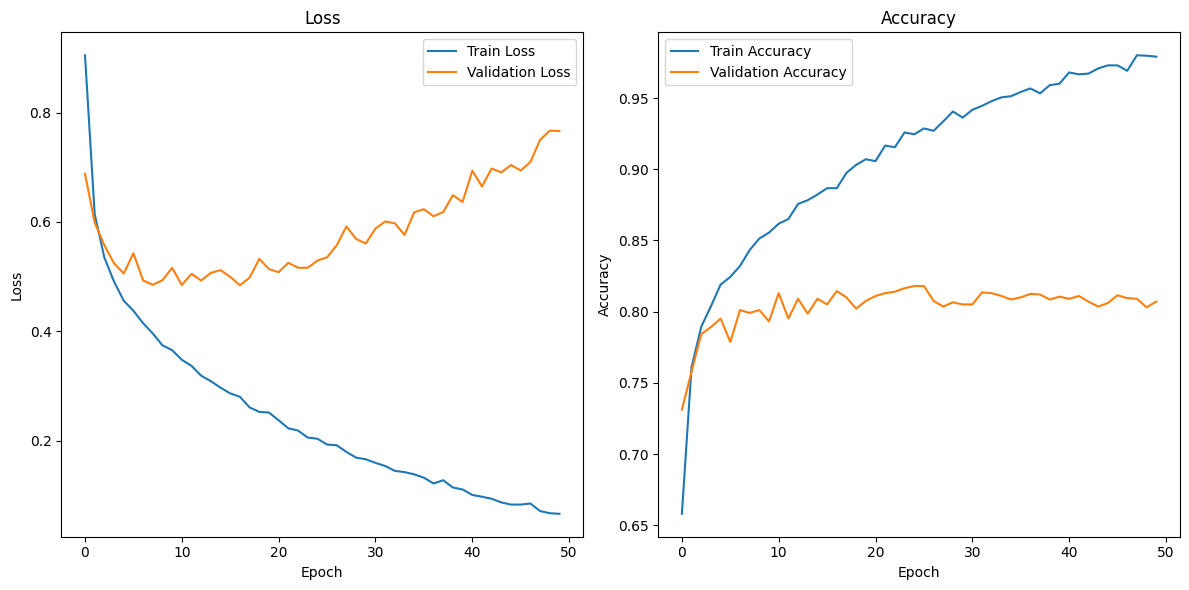

In [12]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_dict.values(), label='Train Loss')
plt.plot(val_loss_dict.values(), label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_dict.values(), label='Train Accuracy')
plt.plot(val_acc_dict.values(), label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

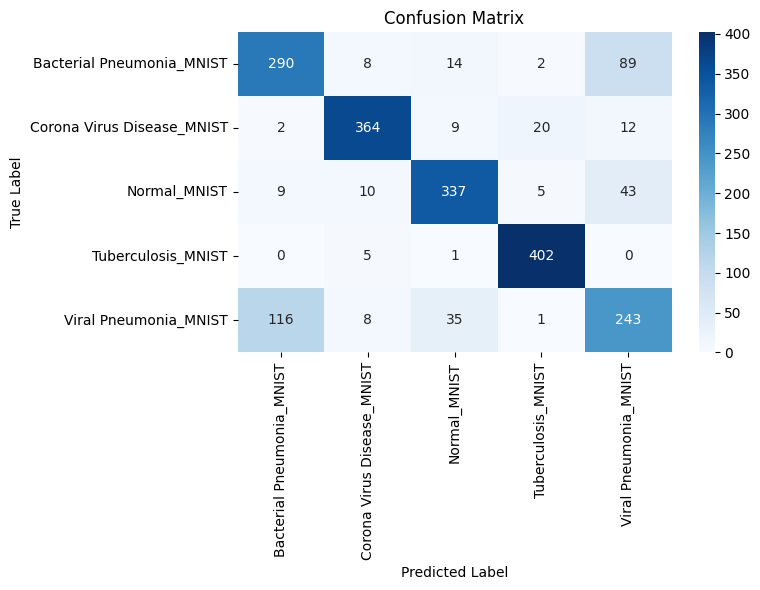

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After getting y_true and y_pred from test loop
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# CNN

In [14]:
class CNN_Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN_Net, self).__init__()

        # Convolutional layer 1: input channels, 16 filters, 3x3 kernel
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),  # Batch normalization for 16 feature maps
            nn.ReLU())

        # Convolutional layer 2: 16 filters, 3x3 kernel
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),  # Batch normalization
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Max pooling with 2x2 window

        # Convolutional layer 3: 64 filters, 3x3 kernel
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),  # Batch normalization for 64 feature maps
            nn.ReLU())

        # Convolutional layer 4: 64 filters, 3x3 kernel
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),  # Batch normalization
            nn.ReLU())

        # Convolutional layer 5: 64 filters, 3x3 kernel, with padding
        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),  # Batch normalization
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  # Max pooling with 2x2 window

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),  # Flattened output size, 128 neurons
            nn.ReLU(),
            nn.Linear(128, 128),  # 128 neurons
            nn.ReLU(),
            nn.Linear(128, num_classes))  # Output layer with number of classes

    def forward(self, x):
        # Forward pass through CNN layers
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc(x)  # Pass through fully connected layers
        return x

In [15]:
model = CNN_Net(in_channels=1, num_classes=NUM_CLASSES).to(device)
print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Trainable parameters: 234421


In [16]:
print_model_summary(model)

Model Architecture:
CNN_Net(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training metrics
train_loss_dict = {}
train_acc_dict = {}
val_loss_dict = {}
val_acc_dict = {}

# Training loop
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train()
    train_loss, train_count = 0, 0
    n_train_correct, n_train_samples = 0, 0
    n_val_correct, n_val_samples = 0, 0
    val_loss, val_count = 0, 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        predicted = torch.argmax(outputs.data, 1)
        
        n_train_samples += labels.size(0)
        n_train_correct += (predicted == labels).sum().item()
        
        train_loss += loss.item()
        train_count += 1
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss_dict[epoch] = train_loss / train_count
    train_acc_dict[epoch] = n_train_correct / n_train_samples

    # Validation
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            predicted = torch.argmax(outputs.data, 1)
            
            n_val_samples += labels.size(0)
            n_val_correct += (predicted == labels).sum().item()
            
            val_loss += loss.item()
            val_count += 1
        
        val_loss_dict[epoch] = val_loss / val_count
        val_acc_dict[epoch] = n_val_correct / n_val_samples
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss_dict[epoch]:.4f}, Train Acc: {train_acc_dict[epoch]:.4f}, Val Loss: {val_loss_dict[epoch]:.4f}, Val Acc: {val_acc_dict[epoch]:.4f}')

# Testing
model.eval()
test_correct = 0
test_samples = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        predicted = torch.argmax(outputs.data, 1)
        
        test_samples += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_accuracy = test_correct / test_samples
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

  2%|▏         | 1/50 [00:05<04:22,  5.35s/it]

Epoch [1/50], Train Loss: 0.9574, Train Acc: 0.6388, Val Loss: 0.6403, Val Acc: 0.7297


  4%|▍         | 2/50 [00:09<03:41,  4.62s/it]

Epoch [2/50], Train Loss: 0.5481, Train Acc: 0.7801, Val Loss: 0.5008, Val Acc: 0.7986


  6%|▌         | 3/50 [00:13<03:21,  4.30s/it]

Epoch [3/50], Train Loss: 0.4471, Train Acc: 0.8195, Val Loss: 0.4612, Val Acc: 0.8095


  8%|▊         | 4/50 [00:17<03:12,  4.18s/it]

Epoch [4/50], Train Loss: 0.3928, Train Acc: 0.8470, Val Loss: 0.4451, Val Acc: 0.8135


 10%|█         | 5/50 [00:21<03:05,  4.11s/it]

Epoch [5/50], Train Loss: 0.3491, Train Acc: 0.8629, Val Loss: 0.4608, Val Acc: 0.8150


 12%|█▏        | 6/50 [00:25<02:58,  4.05s/it]

Epoch [6/50], Train Loss: 0.3025, Train Acc: 0.8850, Val Loss: 0.4485, Val Acc: 0.8244


 14%|█▍        | 7/50 [00:29<02:53,  4.04s/it]

Epoch [7/50], Train Loss: 0.2636, Train Acc: 0.9002, Val Loss: 0.4445, Val Acc: 0.8140


 16%|█▌        | 8/50 [00:33<02:47,  3.99s/it]

Epoch [8/50], Train Loss: 0.2201, Train Acc: 0.9210, Val Loss: 0.4403, Val Acc: 0.8264


 18%|█▊        | 9/50 [00:37<02:41,  3.95s/it]

Epoch [9/50], Train Loss: 0.1880, Train Acc: 0.9290, Val Loss: 0.4690, Val Acc: 0.8269


 20%|██        | 10/50 [00:41<02:38,  3.97s/it]

Epoch [10/50], Train Loss: 0.1524, Train Acc: 0.9481, Val Loss: 0.4472, Val Acc: 0.8304


 22%|██▏       | 11/50 [00:44<02:34,  3.95s/it]

Epoch [11/50], Train Loss: 0.1296, Train Acc: 0.9559, Val Loss: 0.4999, Val Acc: 0.8170


 24%|██▍       | 12/50 [00:48<02:29,  3.95s/it]

Epoch [12/50], Train Loss: 0.1017, Train Acc: 0.9706, Val Loss: 0.5424, Val Acc: 0.8170


 26%|██▌       | 13/50 [00:52<02:26,  3.95s/it]

Epoch [13/50], Train Loss: 0.0772, Train Acc: 0.9797, Val Loss: 0.5366, Val Acc: 0.8224


 28%|██▊       | 14/50 [00:56<02:21,  3.94s/it]

Epoch [14/50], Train Loss: 0.0654, Train Acc: 0.9833, Val Loss: 0.5532, Val Acc: 0.8189


 30%|███       | 15/50 [01:00<02:18,  3.95s/it]

Epoch [15/50], Train Loss: 0.0478, Train Acc: 0.9899, Val Loss: 0.5560, Val Acc: 0.8244


 32%|███▏      | 16/50 [01:04<02:14,  3.96s/it]

Epoch [16/50], Train Loss: 0.0385, Train Acc: 0.9926, Val Loss: 0.5857, Val Acc: 0.8299


 34%|███▍      | 17/50 [01:08<02:10,  3.96s/it]

Epoch [17/50], Train Loss: 0.0232, Train Acc: 0.9969, Val Loss: 0.6545, Val Acc: 0.8165


 36%|███▌      | 18/50 [01:12<02:07,  3.98s/it]

Epoch [18/50], Train Loss: 0.0143, Train Acc: 0.9985, Val Loss: 0.6126, Val Acc: 0.8279


 38%|███▊      | 19/50 [01:16<02:02,  3.96s/it]

Epoch [19/50], Train Loss: 0.0106, Train Acc: 0.9993, Val Loss: 0.6403, Val Acc: 0.8269


 40%|████      | 20/50 [01:20<01:58,  3.94s/it]

Epoch [20/50], Train Loss: 0.0084, Train Acc: 0.9997, Val Loss: 0.6852, Val Acc: 0.8274


 42%|████▏     | 21/50 [01:24<01:54,  3.95s/it]

Epoch [21/50], Train Loss: 0.0095, Train Acc: 0.9993, Val Loss: 0.7014, Val Acc: 0.8209


 44%|████▍     | 22/50 [01:28<01:50,  3.96s/it]

Epoch [22/50], Train Loss: 0.0153, Train Acc: 0.9970, Val Loss: 0.7227, Val Acc: 0.8299


 46%|████▌     | 23/50 [01:32<01:47,  3.98s/it]

Epoch [23/50], Train Loss: 0.0071, Train Acc: 0.9995, Val Loss: 0.7280, Val Acc: 0.8274


 48%|████▊     | 24/50 [01:36<01:43,  3.98s/it]

Epoch [24/50], Train Loss: 0.0068, Train Acc: 0.9993, Val Loss: 0.7512, Val Acc: 0.8294


 50%|█████     | 25/50 [01:40<01:39,  3.97s/it]

Epoch [25/50], Train Loss: 0.0056, Train Acc: 0.9997, Val Loss: 0.7945, Val Acc: 0.8239


 52%|█████▏    | 26/50 [01:44<01:35,  3.99s/it]

Epoch [26/50], Train Loss: 0.0048, Train Acc: 0.9993, Val Loss: 0.8276, Val Acc: 0.8185


 54%|█████▍    | 27/50 [01:48<01:31,  4.00s/it]

Epoch [27/50], Train Loss: 0.1081, Train Acc: 0.9661, Val Loss: 0.7641, Val Acc: 0.8135


 56%|█████▌    | 28/50 [01:52<01:28,  4.00s/it]

Epoch [28/50], Train Loss: 0.0195, Train Acc: 0.9952, Val Loss: 0.7672, Val Acc: 0.8259


 58%|█████▊    | 29/50 [01:56<01:23,  3.99s/it]

Epoch [29/50], Train Loss: 0.0070, Train Acc: 0.9988, Val Loss: 0.7614, Val Acc: 0.8309


 60%|██████    | 30/50 [02:00<01:19,  3.97s/it]

Epoch [30/50], Train Loss: 0.0039, Train Acc: 0.9997, Val Loss: 0.7560, Val Acc: 0.8264


 62%|██████▏   | 31/50 [02:04<01:15,  3.96s/it]

Epoch [31/50], Train Loss: 0.0047, Train Acc: 0.9995, Val Loss: 0.8629, Val Acc: 0.8120


 64%|██████▍   | 32/50 [02:08<01:11,  3.97s/it]

Epoch [32/50], Train Loss: 0.0167, Train Acc: 0.9955, Val Loss: 0.8068, Val Acc: 0.8244


 66%|██████▌   | 33/50 [02:12<01:06,  3.94s/it]

Epoch [33/50], Train Loss: 0.0031, Train Acc: 1.0000, Val Loss: 0.7882, Val Acc: 0.8313


 68%|██████▊   | 34/50 [02:16<01:03,  3.96s/it]

Epoch [34/50], Train Loss: 0.0019, Train Acc: 1.0000, Val Loss: 0.8047, Val Acc: 0.8269


 70%|███████   | 35/50 [02:20<00:59,  3.96s/it]

Epoch [35/50], Train Loss: 0.0028, Train Acc: 0.9998, Val Loss: 0.8288, Val Acc: 0.8323


 72%|███████▏  | 36/50 [02:24<00:55,  3.94s/it]

Epoch [36/50], Train Loss: 0.0015, Train Acc: 1.0000, Val Loss: 0.8420, Val Acc: 0.8284


 74%|███████▍  | 37/50 [02:27<00:51,  3.94s/it]

Epoch [37/50], Train Loss: 0.0009, Train Acc: 1.0000, Val Loss: 0.8434, Val Acc: 0.8323


 76%|███████▌  | 38/50 [02:31<00:47,  3.93s/it]

Epoch [38/50], Train Loss: 0.0010, Train Acc: 1.0000, Val Loss: 0.8592, Val Acc: 0.8294


 78%|███████▊  | 39/50 [02:35<00:43,  3.94s/it]

Epoch [39/50], Train Loss: 0.0166, Train Acc: 0.9960, Val Loss: 0.9820, Val Acc: 0.8085


 80%|████████  | 40/50 [02:39<00:39,  3.95s/it]

Epoch [40/50], Train Loss: 0.0997, Train Acc: 0.9671, Val Loss: 0.9078, Val Acc: 0.8070


 82%|████████▏ | 41/50 [02:43<00:35,  3.95s/it]

Epoch [41/50], Train Loss: 0.0125, Train Acc: 0.9969, Val Loss: 0.8515, Val Acc: 0.8239


 84%|████████▍ | 42/50 [02:47<00:31,  3.98s/it]

Epoch [42/50], Train Loss: 0.0040, Train Acc: 0.9998, Val Loss: 0.8500, Val Acc: 0.8289


 86%|████████▌ | 43/50 [02:51<00:27,  3.97s/it]

Epoch [43/50], Train Loss: 0.0041, Train Acc: 0.9995, Val Loss: 0.8396, Val Acc: 0.8313


 88%|████████▊ | 44/50 [02:55<00:23,  3.95s/it]

Epoch [44/50], Train Loss: 0.0024, Train Acc: 0.9997, Val Loss: 0.8596, Val Acc: 0.8234


 90%|█████████ | 45/50 [02:59<00:19,  3.95s/it]

Epoch [45/50], Train Loss: 0.0038, Train Acc: 0.9990, Val Loss: 0.8937, Val Acc: 0.8229


 92%|█████████▏| 46/50 [03:03<00:15,  3.95s/it]

Epoch [46/50], Train Loss: 0.0012, Train Acc: 1.0000, Val Loss: 0.8740, Val Acc: 0.8244


 94%|█████████▍| 47/50 [03:07<00:11,  3.97s/it]

Epoch [47/50], Train Loss: 0.0010, Train Acc: 1.0000, Val Loss: 0.8891, Val Acc: 0.8264


 96%|█████████▌| 48/50 [03:11<00:07,  3.95s/it]

Epoch [48/50], Train Loss: 0.0022, Train Acc: 0.9997, Val Loss: 0.9219, Val Acc: 0.8249


 98%|█████████▊| 49/50 [03:15<00:03,  3.93s/it]

Epoch [49/50], Train Loss: 0.0008, Train Acc: 1.0000, Val Loss: 0.9221, Val Acc: 0.8244


100%|██████████| 50/50 [03:19<00:00,  3.99s/it]

Epoch [50/50], Train Loss: 0.0006, Train Acc: 1.0000, Val Loss: 0.9628, Val Acc: 0.8239


Test Accuracy: 0.8207
F1 Score: 0.8205


In [18]:
from sklearn.metrics import classification_report

# After getting y_true and y_pred from test loop
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

Classification Report:
                            precision    recall  f1-score   support

 Bacterial Pneumonia_MNIST       0.71      0.68      0.70       403
Corona Virus Disease_MNIST       0.95      0.89      0.92       407
              Normal_MNIST       0.86      0.88      0.87       404
        Tuberculosis_MNIST       0.93      0.97      0.95       408
     Viral Pneumonia_MNIST       0.66      0.67      0.67       403

                  accuracy                           0.82      2025
                 macro avg       0.82      0.82      0.82      2025
              weighted avg       0.82      0.82      0.82      2025



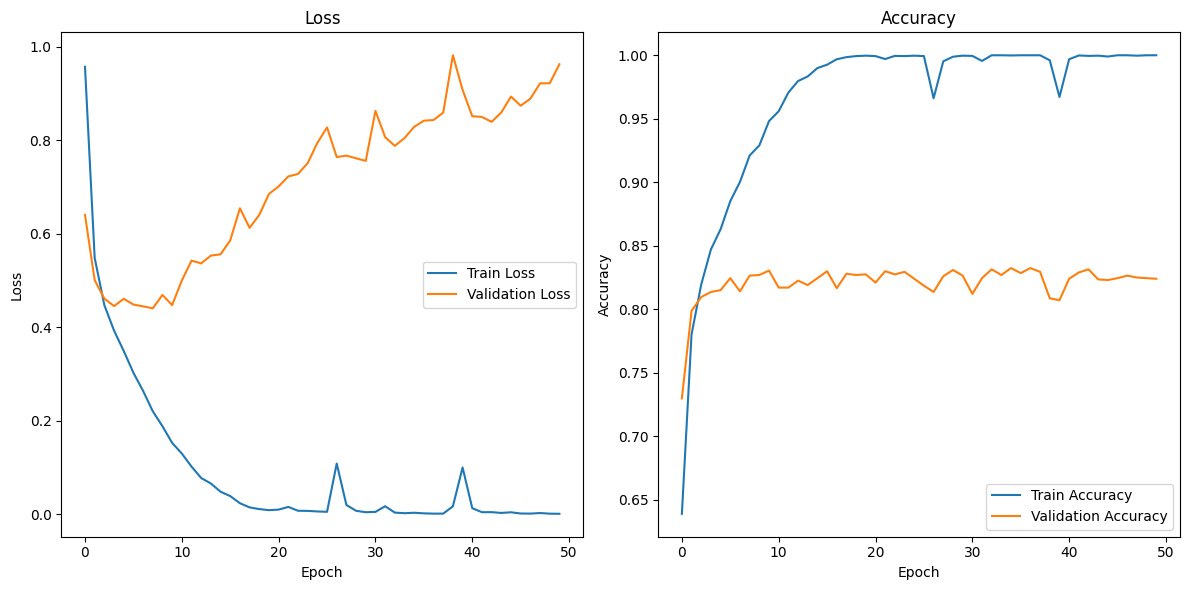

In [19]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_dict.values(), label='Train Loss')
plt.plot(val_loss_dict.values(), label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_dict.values(), label='Train Accuracy')
plt.plot(val_acc_dict.values(), label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

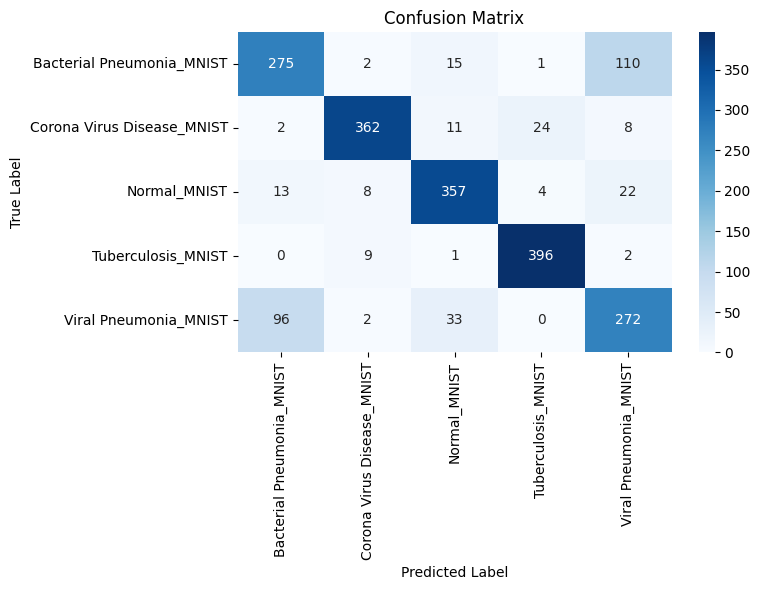

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After getting y_true and y_pred from test loop
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# RNN

In [6]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, img_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.img_size = img_size  # Assume input images are square, img_size x img_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # RNN layer: input_size is the number of pixels in each row
        self.rnn = nn.RNN(input_size=img_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Reshape input to (batch_size, sequence_length, input_size)
        x = x.view(-1, self.img_size, self.img_size)  # (batch_size, sequence_length, input_size)
        
        # RNN forward pass
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Initial hidden state
        out, _ = self.rnn(x, h0)  # RNN returns (output, hidden_state)
        
        # Take the output of the last time step
        out = out[:, -1, :]  # (batch_size, hidden_size)
        
        # Fully connected layer for classification
        out = self.fc(out)  # (batch_size, num_classes)
        return out




In [7]:
# Hyperparameters
hidden_size = 128
num_layers = 2
model = RNN(img_size=IMG_SIZE, hidden_size=hidden_size, num_layers=num_layers, num_classes=NUM_CLASSES).to(device)

print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Trainable parameters: 53893


In [10]:
print_model_summary(model)

Model Architecture:
RNN(
  (rnn): RNN(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=5, bias=True)
)

Layer Parameters:
rnn.weight_ih_l0: torch.Size([128, 28])
rnn.weight_hh_l0: torch.Size([128, 128])
rnn.bias_ih_l0: torch.Size([128])
rnn.bias_hh_l0: torch.Size([128])
rnn.weight_ih_l1: torch.Size([128, 128])
rnn.weight_hh_l1: torch.Size([128, 128])
rnn.bias_ih_l1: torch.Size([128])
rnn.bias_hh_l1: torch.Size([128])
fc.weight: torch.Size([5, 128])
fc.bias: torch.Size([5])

Total Trainable Parameters: 53893


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training metrics
train_loss_dict = {}
train_acc_dict = {}
val_loss_dict = {}
val_acc_dict = {}

# Training loop
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train()
    train_loss, train_count = 0, 0
    n_train_correct, n_train_samples = 0, 0
    n_val_correct, n_val_samples = 0, 0
    val_loss, val_count = 0, 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        predicted = torch.argmax(outputs.data, 1)
        
        n_train_samples += labels.size(0)
        n_train_correct += (predicted == labels).sum().item()
        
        train_loss += loss.item()
        train_count += 1
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss_dict[epoch] = train_loss / train_count
    train_acc_dict[epoch] = n_train_correct / n_train_samples

    # Validation
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            predicted = torch.argmax(outputs.data, 1)
            
            n_val_samples += labels.size(0)
            n_val_correct += (predicted == labels).sum().item()
            
            val_loss += loss.item()
            val_count += 1
        
        val_loss_dict[epoch] = val_loss / val_count
        val_acc_dict[epoch] = n_val_correct / n_val_samples
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss_dict[epoch]:.4f}, Train Acc: {train_acc_dict[epoch]:.4f}, Val Loss: {val_loss_dict[epoch]:.4f}, Val Acc: {val_acc_dict[epoch]:.4f}')

# Testing
model.eval()
test_correct = 0
test_samples = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        predicted = torch.argmax(outputs.data, 1)
        
        test_samples += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_accuracy = test_correct / test_samples
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

  2%|▏         | 1/50 [00:04<03:31,  4.32s/it]

Epoch [1/50], Train Loss: 1.2254, Train Acc: 0.4729, Val Loss: 0.9403, Val Acc: 0.5898


  4%|▍         | 2/50 [00:08<03:09,  3.96s/it]

Epoch [2/50], Train Loss: 0.8970, Train Acc: 0.6194, Val Loss: 0.8853, Val Acc: 0.6166


  6%|▌         | 3/50 [00:11<02:59,  3.83s/it]

Epoch [3/50], Train Loss: 0.8440, Train Acc: 0.6430, Val Loss: 0.8480, Val Acc: 0.6359


  8%|▊         | 4/50 [00:15<02:54,  3.78s/it]

Epoch [4/50], Train Loss: 0.8109, Train Acc: 0.6553, Val Loss: 0.8264, Val Acc: 0.6364


 10%|█         | 5/50 [00:19<02:49,  3.76s/it]

Epoch [5/50], Train Loss: 0.7884, Train Acc: 0.6670, Val Loss: 0.8167, Val Acc: 0.6438


 12%|█▏        | 6/50 [00:22<02:45,  3.77s/it]

Epoch [6/50], Train Loss: 0.7741, Train Acc: 0.6734, Val Loss: 0.7958, Val Acc: 0.6617


 14%|█▍        | 7/50 [00:26<02:40,  3.74s/it]

Epoch [7/50], Train Loss: 0.7676, Train Acc: 0.6711, Val Loss: 0.7835, Val Acc: 0.6612


 16%|█▌        | 8/50 [00:30<02:35,  3.70s/it]

Epoch [8/50], Train Loss: 0.7557, Train Acc: 0.6794, Val Loss: 0.7653, Val Acc: 0.6746


 18%|█▊        | 9/50 [00:33<02:31,  3.69s/it]

Epoch [9/50], Train Loss: 0.7449, Train Acc: 0.6832, Val Loss: 0.7571, Val Acc: 0.6801


 20%|██        | 10/50 [00:37<02:26,  3.67s/it]

Epoch [10/50], Train Loss: 0.7414, Train Acc: 0.6857, Val Loss: 0.7608, Val Acc: 0.6796


 22%|██▏       | 11/50 [00:41<02:23,  3.68s/it]

Epoch [11/50], Train Loss: 0.7343, Train Acc: 0.6875, Val Loss: 0.7483, Val Acc: 0.6870


 24%|██▍       | 12/50 [00:44<02:19,  3.68s/it]

Epoch [12/50], Train Loss: 0.7325, Train Acc: 0.6878, Val Loss: 0.7464, Val Acc: 0.6820


 26%|██▌       | 13/50 [00:48<02:15,  3.66s/it]

Epoch [13/50], Train Loss: 0.7235, Train Acc: 0.6944, Val Loss: 0.7239, Val Acc: 0.6949


 28%|██▊       | 14/50 [00:52<02:11,  3.66s/it]

Epoch [14/50], Train Loss: 0.7049, Train Acc: 0.7025, Val Loss: 0.7208, Val Acc: 0.6935


 30%|███       | 15/50 [00:55<02:08,  3.68s/it]

Epoch [15/50], Train Loss: 0.6850, Train Acc: 0.7091, Val Loss: 0.6862, Val Acc: 0.7247


 32%|███▏      | 16/50 [00:59<02:04,  3.67s/it]

Epoch [16/50], Train Loss: 0.6611, Train Acc: 0.7218, Val Loss: 0.6781, Val Acc: 0.7163


 34%|███▍      | 17/50 [01:03<02:00,  3.65s/it]

Epoch [17/50], Train Loss: 0.6476, Train Acc: 0.7278, Val Loss: 0.6576, Val Acc: 0.7287


 36%|███▌      | 18/50 [01:06<01:56,  3.64s/it]

Epoch [18/50], Train Loss: 0.6318, Train Acc: 0.7390, Val Loss: 0.6718, Val Acc: 0.7222


 38%|███▊      | 19/50 [01:10<01:52,  3.63s/it]

Epoch [19/50], Train Loss: 0.6281, Train Acc: 0.7441, Val Loss: 0.6504, Val Acc: 0.7272


 40%|████      | 20/50 [01:14<01:49,  3.64s/it]

Epoch [20/50], Train Loss: 0.6186, Train Acc: 0.7476, Val Loss: 0.6505, Val Acc: 0.7316


 42%|████▏     | 21/50 [01:17<01:45,  3.63s/it]

Epoch [21/50], Train Loss: 0.6033, Train Acc: 0.7572, Val Loss: 0.6243, Val Acc: 0.7475


 44%|████▍     | 22/50 [01:21<01:41,  3.63s/it]

Epoch [22/50], Train Loss: 0.6011, Train Acc: 0.7532, Val Loss: 0.6202, Val Acc: 0.7436


 46%|████▌     | 23/50 [01:24<01:38,  3.65s/it]

Epoch [23/50], Train Loss: 0.5885, Train Acc: 0.7636, Val Loss: 0.6109, Val Acc: 0.7495


 48%|████▊     | 24/50 [01:28<01:34,  3.64s/it]

Epoch [24/50], Train Loss: 0.5830, Train Acc: 0.7643, Val Loss: 0.6061, Val Acc: 0.7609


 50%|█████     | 25/50 [01:32<01:30,  3.63s/it]

Epoch [25/50], Train Loss: 0.5711, Train Acc: 0.7694, Val Loss: 0.6199, Val Acc: 0.7564


 52%|█████▏    | 26/50 [01:35<01:27,  3.63s/it]

Epoch [26/50], Train Loss: 0.5727, Train Acc: 0.7717, Val Loss: 0.6232, Val Acc: 0.7401


 54%|█████▍    | 27/50 [01:39<01:23,  3.64s/it]

Epoch [27/50], Train Loss: 0.5740, Train Acc: 0.7687, Val Loss: 0.6036, Val Acc: 0.7480


 56%|█████▌    | 28/50 [01:43<01:19,  3.63s/it]

Epoch [28/50], Train Loss: 0.5595, Train Acc: 0.7763, Val Loss: 0.5963, Val Acc: 0.7614


 58%|█████▊    | 29/50 [01:46<01:15,  3.62s/it]

Epoch [29/50], Train Loss: 0.5507, Train Acc: 0.7793, Val Loss: 0.5976, Val Acc: 0.7555


 60%|██████    | 30/50 [01:50<01:12,  3.62s/it]

Epoch [30/50], Train Loss: 0.5522, Train Acc: 0.7843, Val Loss: 0.6278, Val Acc: 0.7396


 62%|██████▏   | 31/50 [01:53<01:08,  3.62s/it]

Epoch [31/50], Train Loss: 0.5491, Train Acc: 0.7830, Val Loss: 0.6030, Val Acc: 0.7560


 64%|██████▍   | 32/50 [01:57<01:05,  3.65s/it]

Epoch [32/50], Train Loss: 0.5441, Train Acc: 0.7856, Val Loss: 0.6102, Val Acc: 0.7584


 66%|██████▌   | 33/50 [02:01<01:02,  3.65s/it]

Epoch [33/50], Train Loss: 0.5391, Train Acc: 0.7861, Val Loss: 0.5812, Val Acc: 0.7758


 68%|██████▊   | 34/50 [02:04<00:58,  3.65s/it]

Epoch [34/50], Train Loss: 0.5336, Train Acc: 0.7906, Val Loss: 0.5974, Val Acc: 0.7540


 70%|███████   | 35/50 [02:08<00:54,  3.63s/it]

Epoch [35/50], Train Loss: 0.5254, Train Acc: 0.7881, Val Loss: 0.5980, Val Acc: 0.7594


 72%|███████▏  | 36/50 [02:12<00:50,  3.62s/it]

Epoch [36/50], Train Loss: 0.5235, Train Acc: 0.7953, Val Loss: 0.5863, Val Acc: 0.7644


 74%|███████▍  | 37/50 [02:15<00:47,  3.63s/it]

Epoch [37/50], Train Loss: 0.5166, Train Acc: 0.7899, Val Loss: 0.5928, Val Acc: 0.7619


 76%|███████▌  | 38/50 [02:19<00:43,  3.63s/it]

Epoch [38/50], Train Loss: 0.5092, Train Acc: 0.7993, Val Loss: 0.5780, Val Acc: 0.7728


 78%|███████▊  | 39/50 [02:23<00:40,  3.64s/it]

Epoch [39/50], Train Loss: 0.5208, Train Acc: 0.7910, Val Loss: 0.5881, Val Acc: 0.7659


 80%|████████  | 40/50 [02:26<00:36,  3.64s/it]

Epoch [40/50], Train Loss: 0.5074, Train Acc: 0.8003, Val Loss: 0.5603, Val Acc: 0.7847


 82%|████████▏ | 41/50 [02:30<00:33,  3.67s/it]

Epoch [41/50], Train Loss: 0.5008, Train Acc: 0.7973, Val Loss: 0.5595, Val Acc: 0.7822


 84%|████████▍ | 42/50 [02:34<00:29,  3.67s/it]

Epoch [42/50], Train Loss: 0.4948, Train Acc: 0.8008, Val Loss: 0.5922, Val Acc: 0.7609


 86%|████████▌ | 43/50 [02:37<00:25,  3.65s/it]

Epoch [43/50], Train Loss: 0.4983, Train Acc: 0.7986, Val Loss: 0.5690, Val Acc: 0.7674


 88%|████████▊ | 44/50 [02:41<00:21,  3.66s/it]

Epoch [44/50], Train Loss: 0.4954, Train Acc: 0.8036, Val Loss: 0.5567, Val Acc: 0.7798


 90%|█████████ | 45/50 [02:45<00:18,  3.65s/it]

Epoch [45/50], Train Loss: 0.4900, Train Acc: 0.8041, Val Loss: 0.5655, Val Acc: 0.7723


 92%|█████████▏| 46/50 [02:48<00:14,  3.65s/it]

Epoch [46/50], Train Loss: 0.4862, Train Acc: 0.8038, Val Loss: 0.5665, Val Acc: 0.7768


 94%|█████████▍| 47/50 [02:52<00:10,  3.63s/it]

Epoch [47/50], Train Loss: 0.4828, Train Acc: 0.8072, Val Loss: 0.5571, Val Acc: 0.7738


 96%|█████████▌| 48/50 [02:55<00:07,  3.64s/it]

Epoch [48/50], Train Loss: 0.4761, Train Acc: 0.8056, Val Loss: 0.5764, Val Acc: 0.7713


 98%|█████████▊| 49/50 [02:59<00:03,  3.65s/it]

Epoch [49/50], Train Loss: 0.4792, Train Acc: 0.8079, Val Loss: 0.5641, Val Acc: 0.7748


100%|██████████| 50/50 [03:03<00:00,  3.67s/it]

Epoch [50/50], Train Loss: 0.4709, Train Acc: 0.8094, Val Loss: 0.5703, Val Acc: 0.7708


Test Accuracy: 0.7842
F1 Score: 0.7852


In [12]:
from sklearn.metrics import classification_report

# After getting y_true and y_pred from test loop
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

Classification Report:
                            precision    recall  f1-score   support

 Bacterial Pneumonia_MNIST       0.63      0.78      0.70       403
Corona Virus Disease_MNIST       0.88      0.87      0.88       407
              Normal_MNIST       0.92      0.72      0.81       404
        Tuberculosis_MNIST       0.91      0.96      0.93       408
     Viral Pneumonia_MNIST       0.63      0.59      0.61       403

                  accuracy                           0.78      2025
                 macro avg       0.79      0.78      0.78      2025
              weighted avg       0.79      0.78      0.79      2025



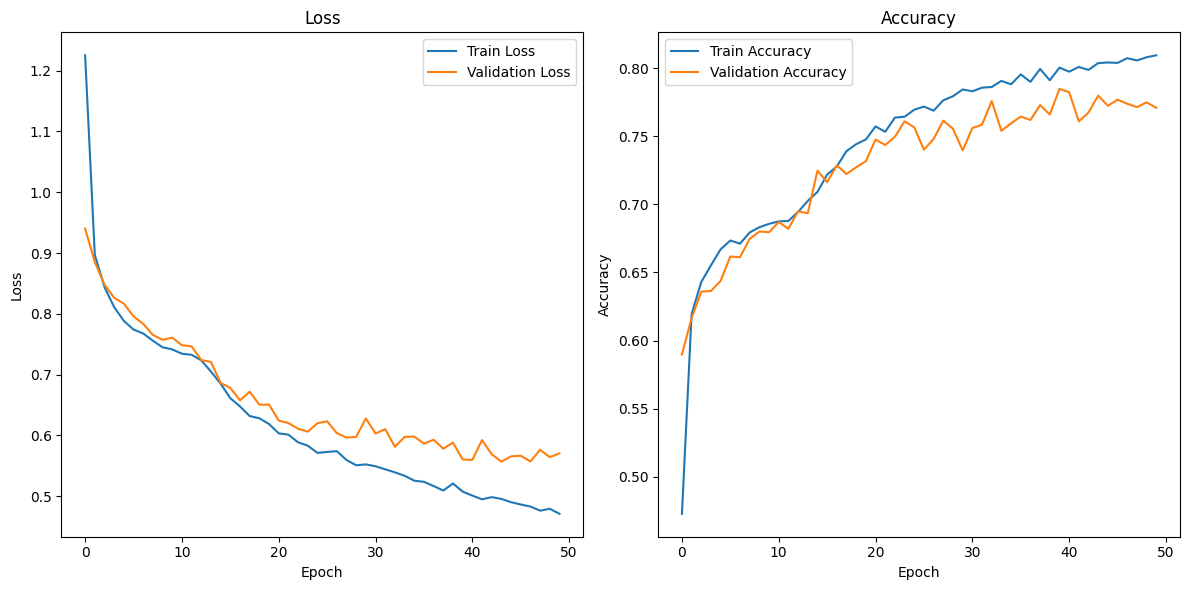

In [13]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_dict.values(), label='Train Loss')
plt.plot(val_loss_dict.values(), label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_dict.values(), label='Train Accuracy')
plt.plot(val_acc_dict.values(), label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

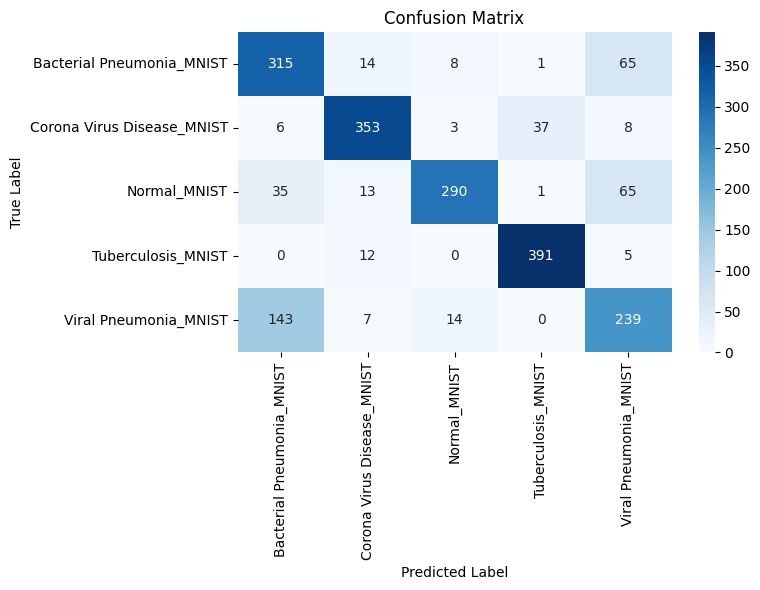

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After getting y_true and y_pred from test loop
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Bi-LSTM

In [15]:
# Define the Bi-LSTM model
class BiLSTM(nn.Module):
    def __init__(self, img_size, hidden_size, num_layers, num_classes):
        super(BiLSTM, self).__init__()
        self.img_size = img_size  # Assume input images are square: img_size x img_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bi-LSTM layer: input_size is the number of pixels in each row
        self.lstm = nn.LSTM(
            input_size=img_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            bidirectional=True, 
            batch_first=True
        )
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply by 2 because of bidirectionality

    def forward(self, x):
        # Reshape input to (batch_size, sequence_length, input_size)
        x = x.view(-1, self.img_size, self.img_size)  # (batch_size, sequence_length, input_size)
        
        # Initial hidden and cell states for LSTM
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # 2 for bidirectional
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        
        # Forward pass through Bi-LSTM
        out, _ = self.lstm(x, (h0, c0))  # LSTM returns (output, (hidden_state, cell_state))
        
        # Take the output of the last time step
        out = out[:, -1, :]  # (batch_size, hidden_size * 2)
        
        # Fully connected layer for classification
        out = self.fc(out)  # (batch_size, num_classes)
        return out

In [17]:
HIDDEN_SIZE = 128
NUM_LAYERS = 2
model = BiLSTM(img_size=IMG_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, num_classes=NUM_CLASSES).to(device)

print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Trainable parameters: 558341


In [18]:
print_model_summary(model)

Model Architecture:
BiLSTM(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)

Layer Parameters:
lstm.weight_ih_l0: torch.Size([512, 28])
lstm.weight_hh_l0: torch.Size([512, 128])
lstm.bias_ih_l0: torch.Size([512])
lstm.bias_hh_l0: torch.Size([512])
lstm.weight_ih_l0_reverse: torch.Size([512, 28])
lstm.weight_hh_l0_reverse: torch.Size([512, 128])
lstm.bias_ih_l0_reverse: torch.Size([512])
lstm.bias_hh_l0_reverse: torch.Size([512])
lstm.weight_ih_l1: torch.Size([512, 256])
lstm.weight_hh_l1: torch.Size([512, 128])
lstm.bias_ih_l1: torch.Size([512])
lstm.bias_hh_l1: torch.Size([512])
lstm.weight_ih_l1_reverse: torch.Size([512, 256])
lstm.weight_hh_l1_reverse: torch.Size([512, 128])
lstm.bias_ih_l1_reverse: torch.Size([512])
lstm.bias_hh_l1_reverse: torch.Size([512])
fc.weight: torch.Size([5, 256])
fc.bias: torch.Size([5])

Total Trainable Parameters: 558341


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training metrics
train_loss_dict = {}
train_acc_dict = {}
val_loss_dict = {}
val_acc_dict = {}

# Training loop
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train()
    train_loss, train_count = 0, 0
    n_train_correct, n_train_samples = 0, 0
    n_val_correct, n_val_samples = 0, 0
    val_loss, val_count = 0, 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        predicted = torch.argmax(outputs.data, 1)
        
        n_train_samples += labels.size(0)
        n_train_correct += (predicted == labels).sum().item()
        
        train_loss += loss.item()
        train_count += 1
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss_dict[epoch] = train_loss / train_count
    train_acc_dict[epoch] = n_train_correct / n_train_samples

    # Validation
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            predicted = torch.argmax(outputs.data, 1)
            
            n_val_samples += labels.size(0)
            n_val_correct += (predicted == labels).sum().item()
            
            val_loss += loss.item()
            val_count += 1
        
        val_loss_dict[epoch] = val_loss / val_count
        val_acc_dict[epoch] = n_val_correct / n_val_samples
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss_dict[epoch]:.4f}, Train Acc: {train_acc_dict[epoch]:.4f}, Val Loss: {val_loss_dict[epoch]:.4f}, Val Acc: {val_acc_dict[epoch]:.4f}')

# Testing
model.eval()
test_correct = 0
test_samples = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        predicted = torch.argmax(outputs.data, 1)
        
        test_samples += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_accuracy = test_correct / test_samples
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

  2%|▏         | 1/50 [00:04<03:39,  4.47s/it]

Epoch [1/50], Train Loss: 1.3648, Train Acc: 0.3973, Val Loss: 0.9750, Val Acc: 0.5714


  4%|▍         | 2/50 [00:09<03:36,  4.52s/it]

Epoch [2/50], Train Loss: 0.8585, Train Acc: 0.6264, Val Loss: 0.8256, Val Acc: 0.6305


  6%|▌         | 3/50 [00:13<03:31,  4.51s/it]

Epoch [3/50], Train Loss: 0.7849, Train Acc: 0.6544, Val Loss: 0.8050, Val Acc: 0.6419


  8%|▊         | 4/50 [00:17<03:26,  4.49s/it]

Epoch [4/50], Train Loss: 0.7500, Train Acc: 0.6756, Val Loss: 0.7704, Val Acc: 0.6706


 10%|█         | 5/50 [00:22<03:22,  4.49s/it]

Epoch [5/50], Train Loss: 0.7111, Train Acc: 0.7037, Val Loss: 0.7069, Val Acc: 0.7063


 12%|█▏        | 6/50 [00:26<03:17,  4.50s/it]

Epoch [6/50], Train Loss: 0.6810, Train Acc: 0.7167, Val Loss: 0.6730, Val Acc: 0.7197


 14%|█▍        | 7/50 [00:31<03:14,  4.52s/it]

Epoch [7/50], Train Loss: 0.6486, Train Acc: 0.7329, Val Loss: 0.6564, Val Acc: 0.7307


 16%|█▌        | 8/50 [00:36<03:09,  4.52s/it]

Epoch [8/50], Train Loss: 0.6123, Train Acc: 0.7468, Val Loss: 0.6417, Val Acc: 0.7406


 18%|█▊        | 9/50 [00:40<03:06,  4.55s/it]

Epoch [9/50], Train Loss: 0.5949, Train Acc: 0.7588, Val Loss: 0.6263, Val Acc: 0.7540


 20%|██        | 10/50 [00:45<03:01,  4.53s/it]

Epoch [10/50], Train Loss: 0.5645, Train Acc: 0.7711, Val Loss: 0.6099, Val Acc: 0.7609


 22%|██▏       | 11/50 [00:49<02:55,  4.50s/it]

Epoch [11/50], Train Loss: 0.5534, Train Acc: 0.7767, Val Loss: 0.6075, Val Acc: 0.7465


 24%|██▍       | 12/50 [00:54<02:50,  4.49s/it]

Epoch [12/50], Train Loss: 0.5537, Train Acc: 0.7790, Val Loss: 0.6103, Val Acc: 0.7460


 26%|██▌       | 13/50 [00:58<02:46,  4.49s/it]

Epoch [13/50], Train Loss: 0.5344, Train Acc: 0.7866, Val Loss: 0.5804, Val Acc: 0.7684


 28%|██▊       | 14/50 [01:03<02:41,  4.49s/it]

Epoch [14/50], Train Loss: 0.5137, Train Acc: 0.7957, Val Loss: 0.5605, Val Acc: 0.7733


 30%|███       | 15/50 [01:07<02:37,  4.49s/it]

Epoch [15/50], Train Loss: 0.5091, Train Acc: 0.7967, Val Loss: 0.5817, Val Acc: 0.7669


 32%|███▏      | 16/50 [01:12<02:34,  4.53s/it]

Epoch [16/50], Train Loss: 0.4963, Train Acc: 0.8034, Val Loss: 0.5591, Val Acc: 0.7703


 34%|███▍      | 17/50 [01:16<02:28,  4.51s/it]

Epoch [17/50], Train Loss: 0.4845, Train Acc: 0.8084, Val Loss: 0.5874, Val Acc: 0.7644


 36%|███▌      | 18/50 [01:21<02:23,  4.49s/it]

Epoch [18/50], Train Loss: 0.4790, Train Acc: 0.8127, Val Loss: 0.5405, Val Acc: 0.7837


 38%|███▊      | 19/50 [01:25<02:18,  4.48s/it]

Epoch [19/50], Train Loss: 0.4673, Train Acc: 0.8127, Val Loss: 0.5420, Val Acc: 0.7808


 40%|████      | 20/50 [01:29<02:13,  4.46s/it]

Epoch [20/50], Train Loss: 0.4585, Train Acc: 0.8183, Val Loss: 0.5507, Val Acc: 0.7733


 42%|████▏     | 21/50 [01:34<02:09,  4.47s/it]

Epoch [21/50], Train Loss: 0.4515, Train Acc: 0.8180, Val Loss: 0.5434, Val Acc: 0.7793


 44%|████▍     | 22/50 [01:38<02:05,  4.47s/it]

Epoch [22/50], Train Loss: 0.4433, Train Acc: 0.8204, Val Loss: 0.5296, Val Acc: 0.7872


 46%|████▌     | 23/50 [01:43<02:01,  4.49s/it]

Epoch [23/50], Train Loss: 0.4346, Train Acc: 0.8254, Val Loss: 0.5520, Val Acc: 0.7793


 48%|████▊     | 24/50 [01:47<01:55,  4.46s/it]

Epoch [24/50], Train Loss: 0.4314, Train Acc: 0.8287, Val Loss: 0.5263, Val Acc: 0.7892


 50%|█████     | 25/50 [01:52<01:51,  4.45s/it]

Epoch [25/50], Train Loss: 0.4205, Train Acc: 0.8327, Val Loss: 0.5470, Val Acc: 0.7768


 52%|█████▏    | 26/50 [01:56<01:47,  4.46s/it]

Epoch [26/50], Train Loss: 0.4240, Train Acc: 0.8330, Val Loss: 0.5179, Val Acc: 0.7917


 54%|█████▍    | 27/50 [02:01<01:42,  4.44s/it]

Epoch [27/50], Train Loss: 0.4124, Train Acc: 0.8314, Val Loss: 0.5184, Val Acc: 0.7852


 56%|█████▌    | 28/50 [02:05<01:37,  4.45s/it]

Epoch [28/50], Train Loss: 0.4057, Train Acc: 0.8404, Val Loss: 0.5151, Val Acc: 0.7946


 58%|█████▊    | 29/50 [02:10<01:33,  4.45s/it]

Epoch [29/50], Train Loss: 0.3966, Train Acc: 0.8399, Val Loss: 0.5319, Val Acc: 0.7902


 60%|██████    | 30/50 [02:14<01:29,  4.46s/it]

Epoch [30/50], Train Loss: 0.3918, Train Acc: 0.8437, Val Loss: 0.5290, Val Acc: 0.7897


 62%|██████▏   | 31/50 [02:18<01:24,  4.45s/it]

Epoch [31/50], Train Loss: 0.3881, Train Acc: 0.8434, Val Loss: 0.5131, Val Acc: 0.7907


 64%|██████▍   | 32/50 [02:23<01:19,  4.44s/it]

Epoch [32/50], Train Loss: 0.3855, Train Acc: 0.8444, Val Loss: 0.5394, Val Acc: 0.7852


 66%|██████▌   | 33/50 [02:27<01:15,  4.44s/it]

Epoch [33/50], Train Loss: 0.3825, Train Acc: 0.8452, Val Loss: 0.5131, Val Acc: 0.7922


 68%|██████▊   | 34/50 [02:32<01:11,  4.45s/it]

Epoch [34/50], Train Loss: 0.3666, Train Acc: 0.8543, Val Loss: 0.5176, Val Acc: 0.8001


 70%|███████   | 35/50 [02:36<01:06,  4.45s/it]

Epoch [35/50], Train Loss: 0.3637, Train Acc: 0.8561, Val Loss: 0.5139, Val Acc: 0.7951


 72%|███████▏  | 36/50 [02:41<01:02,  4.43s/it]

Epoch [36/50], Train Loss: 0.3584, Train Acc: 0.8570, Val Loss: 0.5191, Val Acc: 0.7902


 74%|███████▍  | 37/50 [02:45<00:58,  4.49s/it]

Epoch [37/50], Train Loss: 0.3636, Train Acc: 0.8537, Val Loss: 0.5139, Val Acc: 0.8001


 76%|███████▌  | 38/50 [02:50<00:53,  4.46s/it]

Epoch [38/50], Train Loss: 0.3494, Train Acc: 0.8617, Val Loss: 0.5272, Val Acc: 0.7917


 78%|███████▊  | 39/50 [02:54<00:48,  4.45s/it]

Epoch [39/50], Train Loss: 0.3440, Train Acc: 0.8603, Val Loss: 0.5239, Val Acc: 0.7897


 80%|████████  | 40/50 [02:59<00:44,  4.45s/it]

Epoch [40/50], Train Loss: 0.3392, Train Acc: 0.8665, Val Loss: 0.5260, Val Acc: 0.7937


 82%|████████▏ | 41/50 [03:03<00:39,  4.43s/it]

Epoch [41/50], Train Loss: 0.3402, Train Acc: 0.8675, Val Loss: 0.5078, Val Acc: 0.7956


 84%|████████▍ | 42/50 [03:07<00:35,  4.42s/it]

Epoch [42/50], Train Loss: 0.3426, Train Acc: 0.8631, Val Loss: 0.5135, Val Acc: 0.7946


 86%|████████▌ | 43/50 [03:12<00:30,  4.42s/it]

Epoch [43/50], Train Loss: 0.3279, Train Acc: 0.8692, Val Loss: 0.5462, Val Acc: 0.7857


 88%|████████▊ | 44/50 [03:16<00:26,  4.48s/it]

Epoch [44/50], Train Loss: 0.3196, Train Acc: 0.8728, Val Loss: 0.5472, Val Acc: 0.7892


 90%|█████████ | 45/50 [03:21<00:22,  4.47s/it]

Epoch [45/50], Train Loss: 0.3210, Train Acc: 0.8746, Val Loss: 0.5188, Val Acc: 0.7961


 92%|█████████▏| 46/50 [03:25<00:17,  4.46s/it]

Epoch [46/50], Train Loss: 0.3133, Train Acc: 0.8720, Val Loss: 0.5175, Val Acc: 0.7961


 94%|█████████▍| 47/50 [03:30<00:13,  4.44s/it]

Epoch [47/50], Train Loss: 0.3076, Train Acc: 0.8766, Val Loss: 0.5349, Val Acc: 0.7976


 96%|█████████▌| 48/50 [03:34<00:08,  4.44s/it]

Epoch [48/50], Train Loss: 0.3042, Train Acc: 0.8814, Val Loss: 0.5507, Val Acc: 0.7882


 98%|█████████▊| 49/50 [03:39<00:04,  4.44s/it]

Epoch [49/50], Train Loss: 0.3046, Train Acc: 0.8796, Val Loss: 0.5365, Val Acc: 0.7892


100%|██████████| 50/50 [03:43<00:00,  4.47s/it]

Epoch [50/50], Train Loss: 0.2969, Train Acc: 0.8824, Val Loss: 0.5260, Val Acc: 0.7902


Test Accuracy: 0.8089
F1 Score: 0.8087


In [20]:
from sklearn.metrics import classification_report

# After getting y_true and y_pred from test loop
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

Classification Report:
                            precision    recall  f1-score   support

 Bacterial Pneumonia_MNIST       0.76      0.65      0.70       403
Corona Virus Disease_MNIST       0.92      0.88      0.90       407
              Normal_MNIST       0.81      0.85      0.83       404
        Tuberculosis_MNIST       0.94      0.97      0.95       408
     Viral Pneumonia_MNIST       0.63      0.69      0.66       403

                  accuracy                           0.81      2025
                 macro avg       0.81      0.81      0.81      2025
              weighted avg       0.81      0.81      0.81      2025



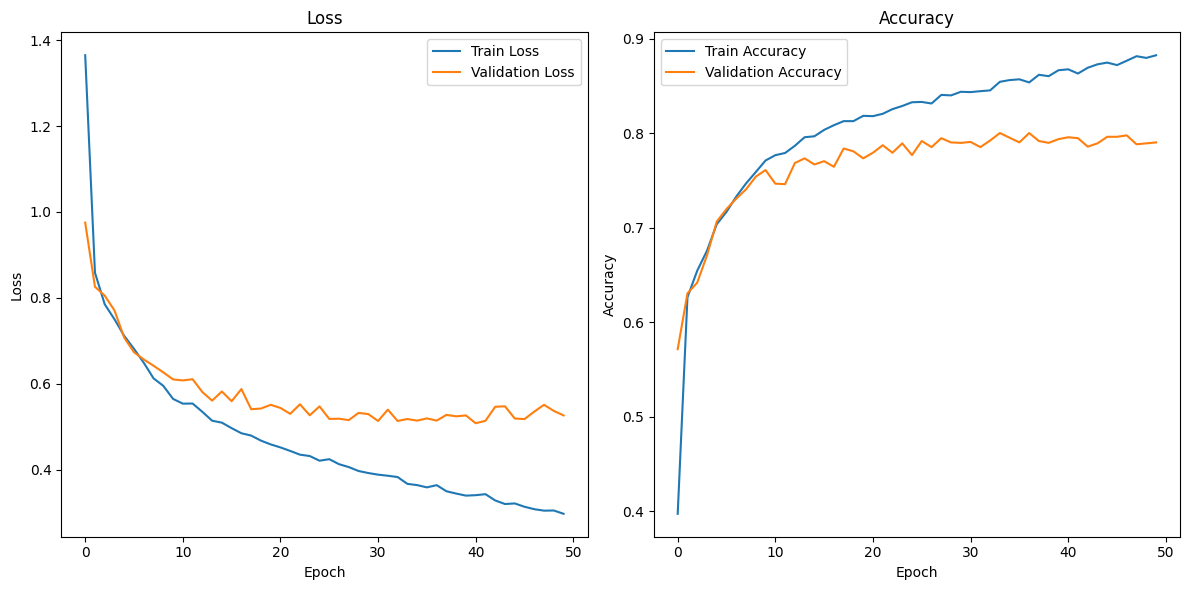

In [21]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_dict.values(), label='Train Loss')
plt.plot(val_loss_dict.values(), label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_dict.values(), label='Train Accuracy')
plt.plot(val_acc_dict.values(), label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

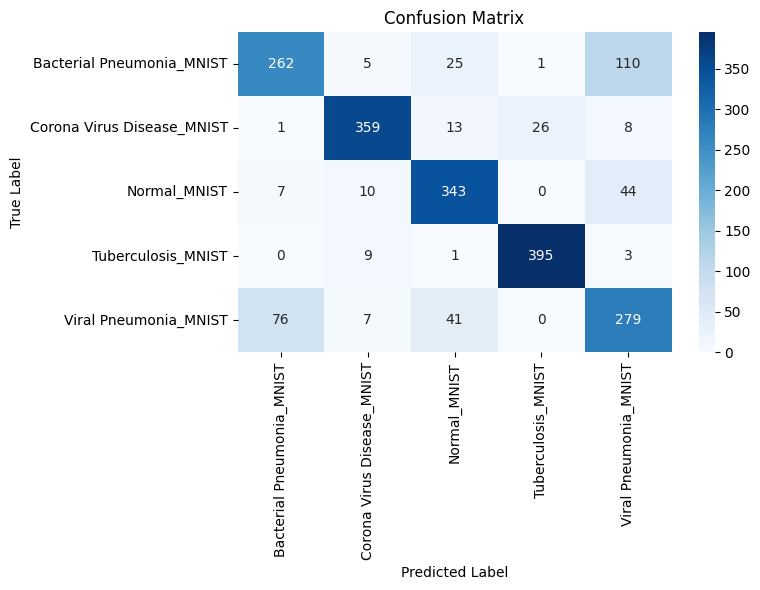

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After getting y_true and y_pred from test loop
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Conv KAN

In [8]:
import numpy as np
import torch
import torch.nn.functional as F
import math
import torchvision
import  matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from torch.cuda.amp import autocast
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.optim import AdamW
from tqdm.auto import tqdm

from timeit import default_timer as timer

In [9]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
class KolmogorovActivation(nn.Module):
    """
    The KolmogorovActivation class defines an activation function based on the Kolmogorov-Arnold representation theorem

        1. Sine term: The code computes the sine of the input x using torch.sin(x). The sine function introduces periodic behavior and captures non-linear patterns in the input
    
    The KolmogorovActivation class provides an activation function that leverages the Kolmogorov-Arnold representation theorem. The theorem states that any continuous function can be represented as a superposition of a finite number of continuous functions. By combining the input, sine, the activation function can approximate a wide range of non-linear functions and capture complex patterns in the input data
    The use of the Kolmogorov-Arnold representation theorem in the activation function allows the neural network to learn more expressive and flexible representations of the input data. The combination of different mathematical terms introduces non-linearity and enables the network to capture intricate relationships and patterns in the data
    """
    def forward(self, x):
        return x + torch.sin(x)
    
    
class KANPreprocessing(torch.nn.Module):
    def __init__(self, in_dim, out_dim, device=device):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.device = device
        
        self.register_buffer('norm_mean', torch.zeros(in_dim, device=device))
        self.register_buffer('norm_std', torch.ones(in_dim, device=device))
        
        self.projection_matrix = torch.nn.Parameter(torch.eye(in_dim, out_dim, device=device))
    
    def forward(self, x):
        x_norm = (x - self.norm_mean) / (self.norm_std + 1e-8)
        x_proj = F.linear(x_norm, self.projection_matrix)
        return x_proj
    
        
class KANLinearFFT(torch.nn.Module):
    """
    The code implements a Kolmogorov-Arnold Network (KAN) linear layer using the Fast Fourier Transform (FFT)

        1. Spline basis functions: The code computes spline basis functions using cosine and sine functions. These basis functions are used to approximate the input data
        2. Coefficients: The code initializes the coefficients (self.coeff) with random values scaled by noise_scale. These coefficients are learned during training and used to weight the spline basis functions
        3. Base function: The code applies a base function (self.base_fun) to the input data and scales it using self.scale_base. This base function is added to the spline output
        4. Spline output: The code computes the spline output using Einstein summation (torch.einsum). It multiplies the spline basis functions with the scaled coefficients

    The code aims to implement a KAN linear layer that respects the Kolmogorov-Arnold theorem and networks. The mathematical components work together to approximate the input data using spline basis functions and learned coefficients while applying regularization to promote desirable properties in the learned representation
    """
    def __init__(
        self,
        in_dim,
        out_dim,
        grid_size=5,
        noise_scale=0.1,
        noise_scale_base=0.1,
        scale_spline=None,
        base_fun=KolmogorovActivation(),
        bias=False,
        bias_trainable=True,
        sp_trainable=True,
        sb_trainable=True,
        device=device,
        preprocess_dim=None
    ):
        torch.nn.Module.__init__(self)
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.base_fun = base_fun
        self.size = in_dim * out_dim
        self.grid_size = grid_size
        self.device = device

        if preprocess_dim is None:
            preprocess_dim = in_dim
            
        self.preprocessing = KANPreprocessing(in_dim, preprocess_dim, device=device)

        k = torch.arange(1, self.grid_size + 1, device=device).view(
            1, 1, self.grid_size
        ).to(torch.float32)
        self.register_buffer("k", k)

        if scale_spline is not None:
            self.scale_spline = torch.nn.Parameter(
                torch.full(
                    (
                        out_dim,
                        in_dim,
                    ),
                    fill_value=scale_spline,
                    device=device,
                ),
                requires_grad=sp_trainable,
            )
        else:
            self.register_buffer("scale_spline", torch.tensor([1.0], device=device))

        self.coeff = torch.nn.Parameter(
            torch.randn(2, out_dim, in_dim, grid_size, device=device, dtype=torch.float32)
            * noise_scale
            / (np.sqrt(in_dim) * np.sqrt(grid_size)),
        )

        self.scale_base = torch.nn.Parameter(
            torch.randn(self.out_dim, self.in_dim, device=device) * math.sqrt(2 / (in_dim + out_dim)),
            requires_grad=sb_trainable,
        )

        if bias is True:
            self.bias = torch.nn.Parameter(
                torch.zeros(out_dim, device=device), requires_grad=bias_trainable
            )
        else:
            self.bias = None

    def forward(self, x):
        x = self.preprocessing(x)
        shape = x.shape[:-1]
        x = x.view(-1, self.in_dim)

        x_unsqueezed = x.unsqueeze(-1)
        splines = torch.stack(
            [
                torch.cos(x_unsqueezed * self.k),
                torch.sin(x_unsqueezed * self.k),
            ],
            dim=1,
        ).view(x.shape[0], -1)

        batch_size = x.shape[0]
        y_b = F.linear(self.base_fun(x), self.scale_base)

        y_spline = torch.einsum(
            "bk,ok->bo",
            splines,
            (self.coeff * self.scale_spline.unsqueeze(-1)).view(self.out_dim, -1),
        )

        y = y_b + y_spline

        if self.bias is not None:
            y = y + self.bias


        y = y.view(*shape, self.out_dim)

        return y




class KANConv2d(torch.nn.Module):
    """
    The code implements a 2D convolutional layer using Kolmogorov-Arnold Networks (KANs)

        1. Unfolding: The code uses torch.nn.functional.unfold to extract patches from the input tensor. This operation is equivalent to sliding a window over the input tensor and extracting the patches at each position
        2. KANLinearFFT layers: The code creates a ModuleList of KANLinearFFT layers, one for each input channel. These layers are applied to the unfolded patches of the corresponding input channel
        3. Permutation and reshaping: The code permutes and reshapes the unfolded tensor to prepare it for applying the KANLinearFFT layers. The tensor is reshaped to have dimensions (batch_size, num_patches, in_channels, kernel_size^2)
        4. Applying KANLinearFFT layers: The code applies the KANLinearFFT layers to each input channel using a list comprehension and torch.stack. The outputs of the KANLinearFFT layers are stacked along a new dimension
        5. Summing the outputs: The code sums the outputs of the KANLinearFFT layers along the channel dimension using torch.sum(dim=2). This operation combines the contributions from each input channel
        6. Adding bias: If a bias term is specified, the code adds the bias to the output tensor
        7. Computing output spatial dimensions: The code computes the output spatial dimensions (h and w) based on the input shape, kernel size, stride, padding, and dilation. These dimensions are used to reshape the output tensor
        8. Reshaping the output: The code permutes and reshapes the output tensor to have dimensions (*shape[:-3], out_channels, h, w), where *shape[:-3] represents any additional dimensions from the input tensor
    
    The code aims to implement a 2D convolutional layer using KANs, which respects the Kolmogorov-Arnold theorem and networks. The mathematical components work together to extract patches from the input tensor, apply KANLinearFFT layers to each input channel, combine the outputs, and reshape the result to obtain the final output tensor
    """
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size,
        stride=1,
        padding=0,
        dilation=1,
        bias=True,
        device=device,
    ):
        super().__init__()
        self.kernel_size = kernel_size
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.stride = stride
        self.dilation = dilation

        if padding == 'same':
            padding = (kernel_size - 1) // 2
        self.padding = padding

        self.kernels = torch.nn.ModuleList()
        for _ in range(in_channels):
            self.kernels.append(
                KANLinearFFT(kernel_size * kernel_size, out_channels, device=device)
            )

        if bias:
            self.bias = torch.nn.Parameter(
                torch.zeros(out_channels), requires_grad=True
            )
        else:
            self.bias = bias

        self.unfold_params = {
            "kernel_size": kernel_size,
            "stride": stride,
            "padding": padding,
            "dilation": dilation
        }

    def forward(self, x):
        shape = x.shape
        x = x.view(-1, shape[-3], shape[-2], shape[-1])

        x = torch.nn.functional.unfold(x, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding, dilation=self.dilation)
        x = x.permute(0, 2, 1).view(x.shape[0], -1, self.in_channels, self.kernel_size**2)

        x_out = torch.stack([kernel(x[:, :, i, :].contiguous()) for i, kernel in enumerate(self.kernels)], dim=2)
        x = x_out.sum(dim=2)

        if self.bias is not False:
            x = x + self.bias[None, None, :]

        h = (shape[-2] + 2 * self.padding - self.dilation * (self.kernel_size - 1) - 1) // self.stride + 1
        w = (shape[-1] + 2 * self.padding - self.dilation * (self.kernel_size - 1) - 1) // self.stride + 1

        x = x.permute(0, 2, 1).view(*shape[:-3], self.out_channels, h, w)

        return x
        


@torch.jit.script
def b_splines(x, grid, k: int):
    x = x.unsqueeze(-1)
    value = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).float()

    p = 1
    while p <= k:
        # Compute the differences between grid points for the left and right intervals
        diff_left = grid[:, p:-1] - grid[:, : -(p + 1)]
        diff_right = grid[:, p + 1 :] - grid[:, 1:(-p)]

        # Create masks to identify non-zero differences
        mask_left = torch.ne(diff_left, 0)
        mask_right = torch.ne(diff_right, 0)

        # Compute the ratios for the left and right intervals
        # The ratios represent the relative position of x within each interval
        # If the difference is zero, the ratio is set to zero to avoid division by zero
        ratio_left = torch.where(mask_left, (x - grid[:, : -(p + 1)]) / diff_left, torch.zeros_like(diff_left))
        ratio_right = torch.where(mask_right, (grid[:, p + 1 :] - x) / diff_right, torch.zeros_like(diff_right))

        # Update the value using the weighted average of the left and right intervals
        # The weights are determined by the ratios and normalized by their sum
        # A small constant (1e-8) is added to the denominator to avoid division by zero
        value = (ratio_left * value[:, :, :-1] + ratio_right * value[:, :, 1:]) / (ratio_left + ratio_right + 1e-8)

        p += 1

    return value


def curve2coeff(x, y, grid, k, eps=1e-8):
    splines = torch.einsum('ijk->jik', b_splines(x, grid, k))

    # Perform Singular Value Decomposition (SVD) on the splines matrix
    # u: left singular vectors
    # s: singular values
    # v: right singular vectors
    u, s, v = torch.linalg.svd(splines, full_matrices=False)

    # Compute the inverse of the singular values
    # Create a tensor with the same shape as s and fill it with zeros
    s_inv = torch.zeros_like(s)
    # Set the non-zero singular values to their reciprocal
    s_inv[s != 0] = 1 / s[s != 0]
    
    s_inv = torch.diag_embed(s_inv)

    # Compute the coefficients of the curve using the SVD components and the y values
    # The coefficients are obtained by solving the linear system:
    # splines * coefficients = y
    # The solution is given by:
    # coefficients = v * s_inv * u^T * y
    value = v.transpose(-2, -1) @ s_inv @ u.transpose(-2, -1) @ y.transpose(0, 1)
    # Permute the dimensions of the coefficients tensor to match the desired output shape
    value = value.permute(2, 0, 1)
    
    return value
    
class KANLinear(torch.nn.Module):
    """
    The KANLinear class implements a linear layer using Kolmogorov-Arnold Networks (KANs)

        1. Grid creation: The code creates a grid of knot points for the B-splines using torch.linspace. The grid is parameterized and can be updated during training
        2. Coefficient initialization: The code generates random noise for the coefficients and computes the initial coefficients using the curve2coeff function. The coefficients are parameterized and can be updated during training
        3. Base scale initialization: The code initializes the base scale with random values scaled by noise_scale_base
        4. Spline scale initialization: The code initializes the spline scale with a constant value specified by scale_spline
        5. Forward pass: In the forward method, the code computes the B-spline basis functions for the input x using the b_splines function. It then computes the base function output using the base scale and the spline output using the coefficients and spline scale. The base function output and spline output are added together, and a bias term is added if specified
        6. Grid update: The update_grid method updates the grid points based on the input x. It computes the B-spline basis functions for the input x and the original coefficients scaled by the spline scale. It then computes the output using the splines and original coefficients. The input x is sorted, and percentiles are computed for the grid points. The updated grid is computed using a combination of adaptive and uniform grid points. The grid parameter and coefficients are updated with the new grid points using the curve2coeff function

    The KANLinear class provides a linear layer that can learn complex functions using B-splines and adaptive grid points. The coefficients and grid points are parameterized and can be updated during training to better fit the data. The class also includes regularization terms for the coefficients to encourage sparsity and smoothness
    """
    def __init__(
        self,
        in_dim,
        out_dim,
        grid_size=7,
        k=4,
        noise_scale=0.05,  
        noise_scale_base=0.05, 
        scale_spline=1.0,
        base_fun=KolmogorovActivation(),
        bias=True,
        grid_eps=0.01,  
        grid_range=[-1, +1],
        bias_trainable=True,
        sp_trainable=True,
        sb_trainable=True,
        device=device,
    ):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.k = k
        self.base_fun = base_fun
        self.grid_eps = grid_eps
        self.size = in_dim * out_dim
        self.grid_size = grid_size
        self.device = device

        self.register_buffer(
            "grid",
            torch.linspace(grid_range[0], grid_range[1], grid_size + 2 * k + 1, device=device).repeat(self.in_dim, 1)
        )

        noise = torch.randn(grid_size + 1, in_dim, out_dim, device=device) * noise_scale / math.sqrt(grid_size)
        
        coeff_reg = 0.01
        self.coeff = torch.nn.Parameter(
            curve2coeff(
                x=self.grid.T[k:-k], 
                y=noise,
                grid=self.grid,
                k=k,
            ).contiguous()
        )
        self.coeff_reg_loss = coeff_reg * torch.sum(self.coeff ** 2)

        self.scale_base = nn.Parameter(
            (
                1 / (in_dim**0.5)
                + (torch.randn(self.out_dim, self.in_dim, device=device) * 2 - 1)
                * noise_scale_base
            ),
            requires_grad=sb_trainable,
        )
        
        self.scale_spline = nn.Parameter(
            torch.full(
                (
                    out_dim,
                    in_dim,
                ),
                fill_value=scale_spline,
                device=device,
            ),
            requires_grad=sp_trainable,
        )  

        self.mask = torch.nn.Parameter(
            torch.ones(self.out_dim, self.in_dim, device=device)
        )
        if bias:
            self.bias = torch.nn.Parameter(
                torch.zeros(1, out_dim, device=device), requires_grad=bias_trainable
            )
        else:
            self.bias = None

    def forward(self, x):
        shape = x.shape[:-1]
        x = x.view(-1, self.in_dim)

        splines = b_splines(x, self.grid, self.k)  


        y_b = torch.einsum('bi,oi->bo', self.base_fun(x), self.scale_base)
        
        y_spline = torch.einsum('bik,oik->bo', splines, self.coeff * self.scale_spline.unsqueeze(-1))
        
        y = y_b + y_spline

        if self.bias is not None:
            y = y + self.bias

        y = y.view(*shape, self.out_dim)


        return y

    @torch.no_grad()
    def update_grid(self, x, margin=0.01):
        batch_size = x.shape[0]

        splines = b_splines(x, self.grid, self.k)

        orig_coeff = self.coeff * self.scale_spline.unsqueeze(-1)

        y = (splines.permute(1, 0, 2) @ orig_coeff.permute(1, 2, 0)).permute(1, 0, 2)

        x_sorted = torch.sort(x, dim=0)[0]

        percentiles = torch.linspace(0, 100, self.grid_size + 1, device=self.device)
        grid_adaptive = torch.percentile(x_sorted, percentiles, dim=0)

        uniform_step = (
            x_sorted[-1] - x_sorted[0] + 2 * margin
        ) / self.grid_size  # [in_dim]
        grid_uniform = (
            torch.arange(self.grid_size + 1, device=self.device).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.k, 0, -1, device=self.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.k + 1, device=self.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.coeff.data.copy_(curve2coeff(x, y, self.grid, self.k))

class KANLinear2(KANLinear):
    """
    The KANLinear2 class is a variant of the KANLinear class with some modifications

        1. Grid creation: The code creates a grid of knot points for the B-splines using torch.arange. The grid points are evenly spaced based on the specified grid_range and grid_size. The grid is registered as a buffer to avoid being treated as a learnable parameter
        2. Coefficient initialization: The code generates random noise for the coefficients and computes the initial coefficients using the curve2coeff function. The coefficients are parameterized and can be updated during training
        3. Spline scale initialization: If scale_spline is provided, the code initializes the spline scale with the specified value. Otherwise, it registers a buffer with a default value of 1.0
        4. Base scale initialization: The code initializes the base scale with random values scaled by sqrt(2 / (in_dim + out_dim))
        5. Forward pass: In the forward method, the code computes the B-spline basis functions for the input x using the b_splines function. It then computes the base function output using the base scale and the spline output using the coefficients and spline scale. The base function output and spline output are added together, and a bias term is added if specified
    
    The KANLinear2 class provides a linear layer that can learn complex functions using B-splines and fixed grid points. The coefficients are parameterized and can be updated during training to better fit the data
    """
    def __init__(
        self,
        in_dim,
        out_dim,
        grid_size=5,
        k=3,
        noise_scale=0.1,
        noise_scale_base=0.1,
        scale_spline=None,
        base_fun=KolmogorovActivation(),
        grid_eps=0.02,
        grid_range=[-1, +1],
        bias=False,
        bias_trainable=True,
        sp_trainable=True,
        sb_trainable=True,
        device=device,
    ):
        torch.nn.Module.__init__(self)
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.k = k
        self.base_fun = base_fun
        self.grid_eps = grid_eps
        self.size = in_dim * out_dim
        self.grid_size = grid_size
        self.device = device

        step = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            torch.arange(-k, grid_size + k + 1, device=device) * step + grid_range[0]
        ).repeat(self.in_dim, 1)
        self.register_buffer("grid", grid)  

        if scale_spline is not None:
            self.scale_spline = torch.nn.Parameter(
                torch.full(
                    (
                        out_dim,
                        in_dim,
                    ),
                    fill_value=scale_spline,
                    device=device,
                ),
                requires_grad=sp_trainable,
            )
        else:
            self.register_buffer("scale_spline", torch.tensor([1.0], device=device))

        noise = (
            (torch.randn(grid_size + 1, in_dim, out_dim, device=device))
            * noise_scale
            / math.sqrt(self.grid_size)
        )
        coeff_reg = 0.01
        self.coeff = torch.nn.Parameter(
            curve2coeff(
                x=self.grid.T[k:-k], 
                y=noise,
                grid=self.grid,
                k=k,
            ).contiguous()
        )
        self.coeff_reg_loss = coeff_reg * torch.sum(self.coeff ** 2)

        self.scale_base = torch.nn.Parameter(
            torch.randn(self.out_dim, self.in_dim, device=device) * math.sqrt(2 / (in_dim + out_dim)),
            requires_grad=sb_trainable,
        )

        if bias is True:
            self.bias = torch.nn.Parameter(
                torch.rand(out_dim), requires_grad=bias_trainable
            )
        else:
            self.bias = None
            
    def forward(self, x):
        shape = x.shape[:-1]
        x = x.view(-1, self.in_dim)
        

        splines = b_splines(x, self.grid, self.k) 


        batch_size = x.shape[0]
        y_b = F.linear(self.base_fun(x), self.scale_base)

        y_spline = torch.einsum('bik,oik->bo', splines, self.coeff * self.scale_spline.unsqueeze(-1))

        y = y_b + y_spline

        if self.bias is not None:
            y = y + self.bias


        y = y.view(*shape, self.out_dim)

        return y

class KAN_MNISTModelConVKan(nn.Module):
    """
    The `KAN_MNISTModelConVKan` class defines a convolutional neural network architecture for MNIST classification using Kolmogorov-Arnold Networks (KANs)

        1. Convolutional blocks: The network consists of three convolutional blocks (`conv_block_1`, `conv_block_2`). Each block contains a `KANConv2d` layer, followed by `MaxPool2d` layer for downsampling
           - `KANConv2d` is a convolutional layer that uses KANs to learn the convolutional filters. It applies the learned filters to the input feature maps and produces output feature maps
           - `MaxPool2d` performs max pooling operation, which downsamples the feature maps by taking the maximum value within each pooling window
        
        2. Classification block: The classification block (`classifier`) consists of an `AdaptiveAvgPool2d` layer, followed by a `Flatten` layer and a `KANLinear2` layer
           - `AdaptiveAvgPool2d` performs global average pooling, reducing the spatial dimensions of the feature maps to (1, 1). This operation helps in reducing the number of parameters and provides translation invariance
           - `Flatten` reshapes the output of the global average pooling layer into a 1D tensor, preparing it for the final linear layer
           - `KANLinear2` is a linear layer that uses KANs to learn the weights and biases. It takes the flattened features as input and produces the output logits for classification

        3. Forward pass: The `forward` method defines the forward propagation of the input through the network. The input `x` is passed through the three convolutional blocks sequentially, followed by the classification block. The output of the classification block represents the predicted class scores

    The `KAN_MNISTModelConVKan` class provides a convolutional neural network architecture that leverages KANs for both convolutional and linear layers. The use of KANs allows the network to learn complex and expressive representations of the input data. The convolutional blocks capture spatial patterns and features, while the classification block performs the final prediction based on the learned features
    """
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            KANConv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding='same'),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            KANConv2d(in_channels=16, out_channels=32, kernel_size=4, stride=1, padding='same'),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            KANLinear2(in_dim=32, out_dim=len(class_names))
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [11]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return torch.tensor(acc)


def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    
    train_loss, train_acc = 0, 0
    model.train()

    progress_bar = tqdm(data_loader, desc="Training", unit="batch")
    for batch, (X, y) in enumerate(progress_bar):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)).item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        progress_bar.set_postfix({"Loss": loss.item(), "Accuracy": train_acc / (batch + 1)})
            
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def testing_step(model, data_loader, loss_fn, accuracy_fn):    
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        progress_bar = tqdm(data_loader, desc="Testing", unit="batch")
        for X, y in progress_bar:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)).item()

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    test_losses.append(test_loss)
    test_accs.append(test_acc)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [12]:
BATCH_SIZE=128
train_dataloader=DataLoader(dataset=train_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=True,
                           pin_memory=True)
test_dataloader=DataLoader(dataset=test_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=False,
                           pin_memory=True)


In [13]:
class_names= train_dataset.classes    
KAN_mnist_model= KAN_MNISTModelConVKan()
KAN_mnist_model.to(device)

KAN_MNISTModelConVKan(
  (conv_block_1): Sequential(
    (0): KANConv2d(
      (kernels): ModuleList(
        (0): KANLinearFFT(
          (base_fun): KolmogorovActivation()
          (preprocessing): KANPreprocessing()
        )
      )
    )
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): KANConv2d(
      (kernels): ModuleList(
        (0-15): 16 x KANLinearFFT(
          (base_fun): KolmogorovActivation()
          (preprocessing): KANPreprocessing()
        )
      )
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(1, 1))
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): KANLinear2(
      (base_fun): KolmogorovActivat

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def print_model_summary(model):
    print("Model Architecture:")
    print("=" * 50)
    print(model)
    print("\nLayer Parameters:")
    print("=" * 50)
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()}")
    print("\nTotal Trainable Parameters:", count_parameters(model))
    
print_model_summary(KAN_mnist_model)

Model Architecture:
KAN_MNISTModelConVKan(
  (conv_block_1): Sequential(
    (0): KANConv2d(
      (kernels): ModuleList(
        (0): KANLinearFFT(
          (base_fun): KolmogorovActivation()
          (preprocessing): KANPreprocessing()
        )
      )
    )
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): KANConv2d(
      (kernels): ModuleList(
        (0-15): 16 x KANLinearFFT(
          (base_fun): KolmogorovActivation()
          (preprocessing): KANPreprocessing()
        )
      )
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(1, 1))
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): KANLinear2(
      (base_fun

In [18]:
epochs=50
test_loss=0

train_losses = []
train_accs = []
test_losses = []
test_accs = []

y_true = []
y_pred = []
test_pred = []

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=KAN_mnist_model.parameters(), lr=0.005, weight_decay=0.0005, amsgrad=True)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-6)

In [20]:
train_time_start_mnist_model = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch + 1}")
    train_step(model=KAN_mnist_model,
               data_loader= train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn= accuracy_fn)
    
    testing_step(model=KAN_mnist_model,
              data_loader= test_dataloader,
              loss_fn= loss_fn,
              accuracy_fn= accuracy_fn
              )
    scheduler.step() 
    
train_time_end_mnist_model= timer()
print(train_time_end_mnist_model-train_time_start_mnist_model)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.44261 | Train acc: 82.61%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46506 | Test acc: 82.28%
Epoch: 2


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.37904 | Train acc: 85.24%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46922 | Test acc: 81.54%
Epoch: 3


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.35491 | Train acc: 85.98%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.44026 | Test acc: 82.87%
Epoch: 4


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.31918 | Train acc: 87.47%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42481 | Test acc: 82.41%
Epoch: 5


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.29962 | Train acc: 88.01%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.41037 | Test acc: 83.45%
Epoch: 6


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.27988 | Train acc: 89.23%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.44578 | Test acc: 82.15%
Epoch: 7


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.24544 | Train acc: 90.59%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.40440 | Test acc: 83.76%
Epoch: 8


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.21973 | Train acc: 92.24%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42657 | Test acc: 83.28%
Epoch: 9


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.21844 | Train acc: 91.72%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.50028 | Test acc: 81.32%
Epoch: 10


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.20720 | Train acc: 92.13%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42976 | Test acc: 82.91%
Epoch: 11


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.16429 | Train acc: 94.12%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.51282 | Test acc: 80.93%
Epoch: 12


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.15946 | Train acc: 94.32%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.49331 | Test acc: 82.14%
Epoch: 13


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.16095 | Train acc: 94.38%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43190 | Test acc: 84.80%
Epoch: 14


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.16664 | Train acc: 93.88%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43054 | Test acc: 84.08%
Epoch: 15


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.10885 | Train acc: 97.03%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.39895 | Test acc: 85.42%
Epoch: 16


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.09833 | Train acc: 97.03%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42142 | Test acc: 84.50%
Epoch: 17


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.07542 | Train acc: 98.32%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42484 | Test acc: 84.80%
Epoch: 18


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.07394 | Train acc: 98.05%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42713 | Test acc: 85.09%
Epoch: 19


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.06590 | Train acc: 98.30%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.44362 | Test acc: 84.59%
Epoch: 20


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.05626 | Train acc: 98.78%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46307 | Test acc: 83.67%
Epoch: 21


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.05283 | Train acc: 98.81%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.42057 | Test acc: 85.49%
Epoch: 22


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.03645 | Train acc: 99.61%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.45242 | Test acc: 84.15%
Epoch: 23


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.02747 | Train acc: 99.72%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43726 | Test acc: 85.44%
Epoch: 24


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.02044 | Train acc: 99.97%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43195 | Test acc: 86.15%
Epoch: 25


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.01681 | Train acc: 99.98%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43833 | Test acc: 85.80%
Epoch: 26


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.01593 | Train acc: 99.97%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43883 | Test acc: 85.92%
Epoch: 27


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.01331 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.44945 | Test acc: 85.94%
Epoch: 28


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.01178 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.43909 | Test acc: 86.82%
Epoch: 29


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.01073 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.45558 | Test acc: 85.92%
Epoch: 30


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.01046 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.45078 | Test acc: 86.80%
Epoch: 31


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00925 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.45185 | Test acc: 86.68%
Epoch: 32


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00860 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.45527 | Test acc: 86.92%
Epoch: 33


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00878 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46484 | Test acc: 85.90%
Epoch: 34


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00934 | Train acc: 99.98%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.45943 | Test acc: 86.35%
Epoch: 35


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00838 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46065 | Test acc: 86.44%
Epoch: 36


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00775 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46566 | Test acc: 86.91%
Epoch: 37


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00759 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46318 | Test acc: 86.76%
Epoch: 38


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00715 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46404 | Test acc: 86.61%
Epoch: 39


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00664 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46625 | Test acc: 86.57%
Epoch: 40


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00654 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46513 | Test acc: 86.91%
Epoch: 41


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00631 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46776 | Test acc: 86.56%
Epoch: 42


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00605 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.47145 | Test acc: 87.08%
Epoch: 43


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00613 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46730 | Test acc: 86.71%
Epoch: 44


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00613 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46663 | Test acc: 86.88%
Epoch: 45


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00626 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46914 | Test acc: 86.70%
Epoch: 46


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00613 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46915 | Test acc: 87.08%
Epoch: 47


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00600 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46884 | Test acc: 86.85%
Epoch: 48


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00579 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46959 | Test acc: 86.87%
Epoch: 49


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00571 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.46907 | Test acc: 86.70%
Epoch: 50


Training:   0%|          | 0/48 [00:00<?, ?batch/s]


Train loss: 0.00609 | Train acc: 100.00%


Testing:   0%|          | 0/16 [00:00<?, ?batch/s]

Test loss: 0.47119 | Test acc: 87.06%
295.23157000599997


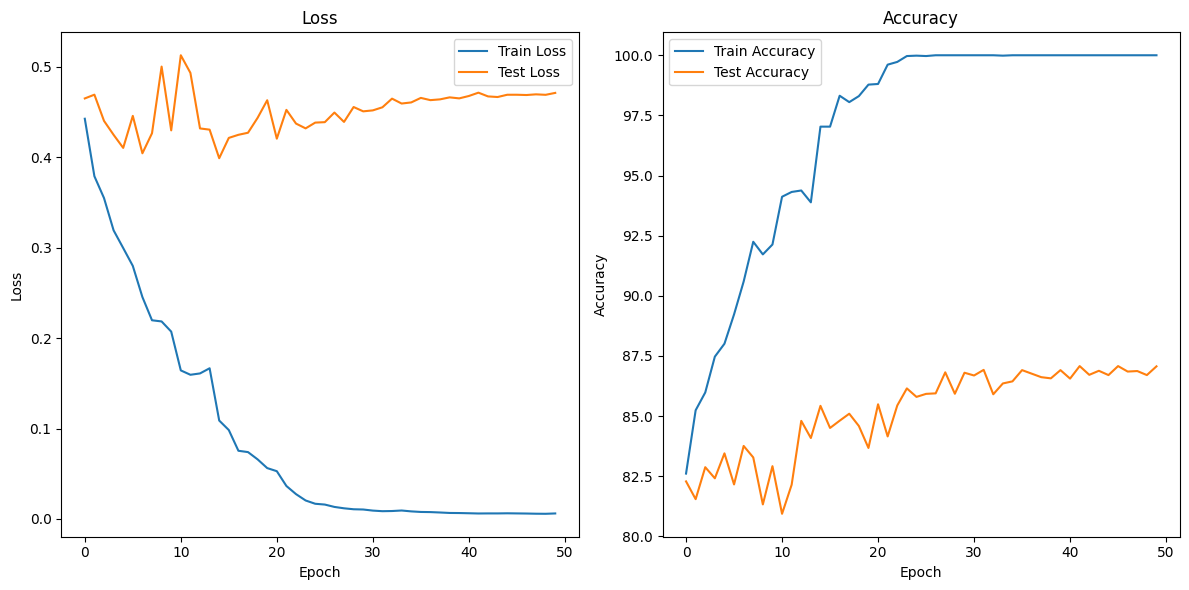

In [22]:
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
    Args:
        y_true: Ground truth labels.
        y_pred: Predicted labels.
        classes: List of class names.
        normalize: If True, normalize the confusion matrix.
        title: Title of the plot.
        cmap: Color map for the plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add numbers inside the confusion matrix
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


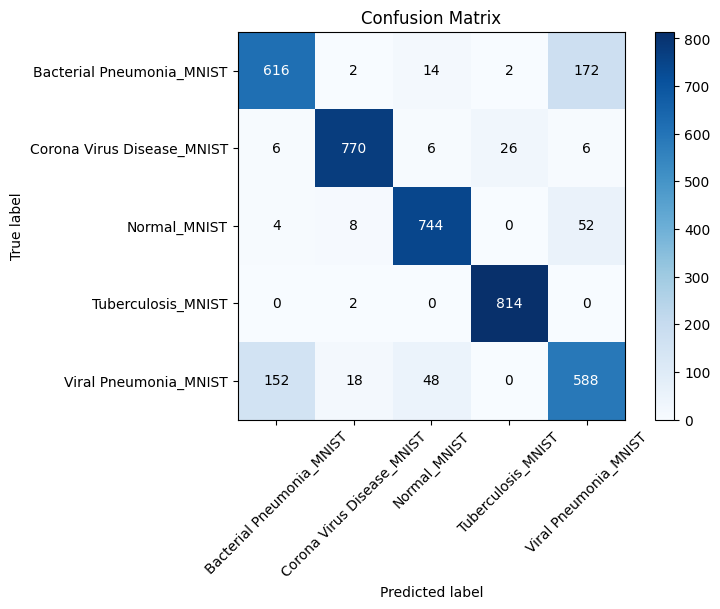

In [27]:
with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = KAN_mnist_model(X)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(pred.argmax(dim=1).cpu().numpy())
        test_pred.extend(pred.cpu().numpy())

plot_confusion_matrix(y_true, y_pred, classes=class_names)

In [28]:
from sklearn.metrics import classification_report

# After getting y_true and y_pred from test loop
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

Classification Report:
                            precision    recall  f1-score   support

 Bacterial Pneumonia_MNIST       0.79      0.76      0.78       806
Corona Virus Disease_MNIST       0.96      0.95      0.95       814
              Normal_MNIST       0.92      0.92      0.92       808
        Tuberculosis_MNIST       0.97      1.00      0.98       816
     Viral Pneumonia_MNIST       0.72      0.73      0.72       806

                  accuracy                           0.87      4050
                 macro avg       0.87      0.87      0.87      4050
              weighted avg       0.87      0.87      0.87      4050

